# **Exploratory Data Analysis**

Cette analyse vise à étudier les données de base de clustering.
L'étude métier suggère l'application de la technique marketing RFM (Recency, Frequency, Monetary)

- Recency : date du dernier achat (durée en jours pertinent pour le marketing et le commerce) 
- Frequency : nombre de commande 
- Monetary : montant total dépensé par client 


In [1]:
import pandas as pd
import os
from pathlib import Path
here = os.getcwd()
repo_wd = Path(here).parent


## **Customers dataset eda**

In [2]:
olist_orders_dataset_path = repo_wd / "data/raw/olist_orders_dataset.csv"
olist_order_payments_dataset_path = repo_wd / "data/raw/olist_order_payments_dataset.csv"
olist_customers_dataset_path = repo_wd / "data/raw/olist_customers_dataset.csv"

olist_orders_dataset = pd.read_csv(olist_orders_dataset_path)
olist_customers_dataset = pd.read_csv(olist_customers_dataset_path)
olist_order_payments_dataset = pd.read_csv(olist_order_payments_dataset_path)


In [3]:
olist_customers_dataset.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [3]:
olist_customers_dataset.dtypes

customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object

Optimisation mémoire sur ``olist_customers_dataset``


In [4]:
for col in olist_customers_dataset.columns:
    olist_customers_dataset[col] = olist_customers_dataset[col].astype('category')


In [5]:
olist_customers_dataset.dtypes

customer_id                 category
customer_unique_id          category
customer_zip_code_prefix    category
customer_city               category
customer_state              category
dtype: object

In [6]:
from autoviz import AutoViz_Class
%matplotlib inline
AV = AutoViz_Class()


Imported v0.1.905. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)


In [8]:
help(AV.AutoViz)

Help on method AutoViz in module autoviz.AutoViz_Class:

AutoViz(filename: str, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False, chart_format='svg', max_rows_analyzed=150000, max_cols_analyzed=30, save_plot_dir=None) method of autoviz.AutoViz_Class.AutoViz_Class instance
    ##############################################################################
    ##### AUTOVIZ PERFORMS AUTOMATIC VISUALIZATION OF ANY DATA SET WITH ONE CLICK.
    #####    Give it any input file (CSV, txt or json) and AV will visualize it.##
    ##### INPUTS:                                                            #####
    #####    A FILE NAME OR A DATA FRAME AS INPUT.                           #####
    ##### AutoViz will visualize any sized file using a statistically valid sample.
    #####  - max_rows_analyzed = 150000 ### this limits the max number of rows ###
    #####           that is used to display charts                             ###
    #####  - max_cols_analyzed = 30  ### This 

Shape of your Data Set loaded: (99441, 5)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  0
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  4
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  1
    Number of Columns to Delete =  0
    5 Predictors classified...
        1 variable(s) removed since they were ID or low-information variables
        List of variables removed: ['customer_id']
To fix these data quality issues in the dataset, impo

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
customer_id,category,0.000000,100,,,Possible ID column: drop before modeling step.
customer_unique_id,category,0.000000,96,,,96096 rare categories: Too many to list. Group them into a single category or drop the categories.
customer_zip_code_prefix,category,0.000000,15,,,14994 rare categories: Too many to list. Group them into a single category or drop the categories.
customer_city,category,0.000000,4,,,4110 rare categories: Too many to list. Group them into a single category or drop the categories.
customer_state,category,0.000000,0,,,15 rare categories: Too many to list. Group them into a single category or drop the categories.


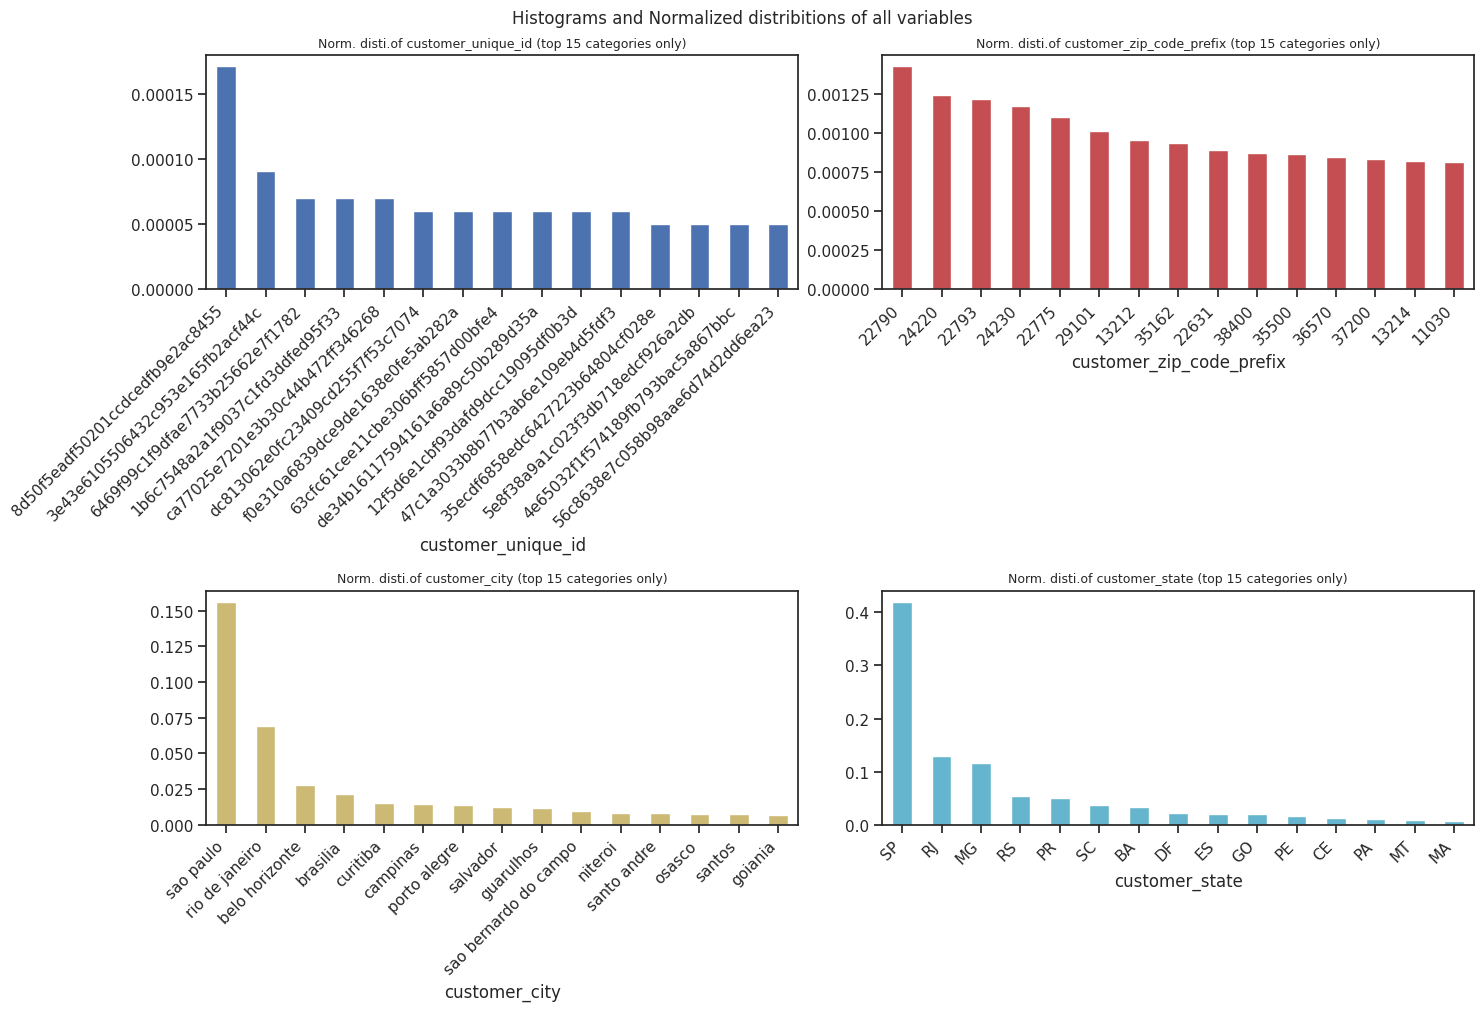

No categorical or boolean vars in data set. Hence no pivot plots...


In [ ]:
# rapide eda
dfte = AV.AutoViz(olist_customers_dataset, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=len(olist_customers_dataset),max_cols_analyzed=len(olist_customers_dataset.columns), save_plot_dir=None)


On note pas de données manquantes avec possibilité à partir de order_dataset de :

- Viusaliser les clients avec le nombre de leurs commandes respectives
- Visualiser les codes postales où les commandes ont été passées
- Visualiser les états et les villes du Brésil où les commandes ont été passées


In [7]:
print(f"{olist_customers_dataset.customer_unique_id.nunique() * 100 / len(olist_customers_dataset):.2f} %", "des clients ont passé une seule commande", "\n")
print(f"{olist_customers_dataset.customer_zip_code_prefix.nunique() * 100 / len(olist_customers_dataset):.2f} %", "des codes postales ont reçu une seule commande", "\n")
print(f"{olist_customers_dataset.customer_city.nunique() * 100 / len(olist_customers_dataset):.2f} %", "des villes où une seule commande à été passée", "\n")
print(f"{olist_customers_dataset.customer_state.nunique() * 100 / len(olist_customers_dataset):.2f} %", "des états du brésil où une seule commande à été passée durant la période de l'étude", "\n")

96.64 % des clients ont passé une seule commande 

15.08 % des codes postales ont reçu une seule commande 

4.14 % des villes où une seule commande à été passée 

0.03 % des états du brésil où une seule commande à été passée durant la période de l'étude 



## **Order payment dataset eda**

In [13]:
olist_order_payments_dataset.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [12]:
olist_order_payments_dataset.dtypes

order_id                category
payment_sequential         int64
payment_type            category
payment_installments       int64
payment_value            float64
dtype: object

In [10]:
for col in olist_order_payments_dataset.columns:
    if olist_order_payments_dataset[col].dtype==object:
         olist_order_payments_dataset[col] = olist_order_payments_dataset[col].astype('category')

In [11]:
olist_order_payments_dataset.dtypes

order_id                category
payment_sequential         int64
payment_type            category
payment_installments       int64
payment_value            float64
dtype: object

Shape of your Data Set loaded: (103886, 5)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  1
    Number of Integer-Categorical Columns =  2
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  2
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    5 Predictors classified...
        No variables removed since no ID or low-information variables found in data set
Since Number of Rows in data 103886 exceeds maximum, randomly sampling 103886 rows for EDA...

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
order_id,category,0.000000,95,,,99440 rare categories: Too many to list. Group them into a single category or drop the categories.
payment_sequential,int64,0.000000,0,1.000000,29.000000,Column has 4526 outliers greater than upper bound (1.00) or lower than lower bound(1.00). Cap them or remove them.
payment_type,category,0.000000,0,,,1 rare categories: ['not_defined']. Group them into a single category or drop the categories.
payment_installments,int64,0.000000,0,0.000000,24.000000,Column has 6313 outliers greater than upper bound (8.50) or lower than lower bound(-3.50). Cap them or remove them.
payment_value,float64,0.000000,NA,0.000000,13664.080000,Column has 7981 outliers greater than upper bound (344.41) or lower than lower bound(-115.78). Cap them or remove them.


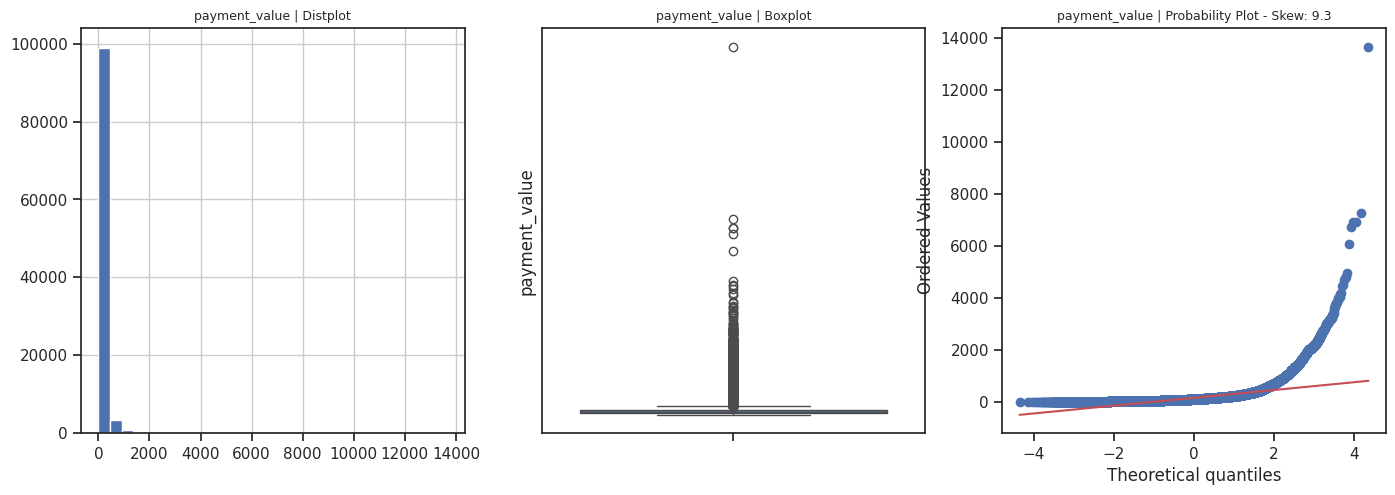

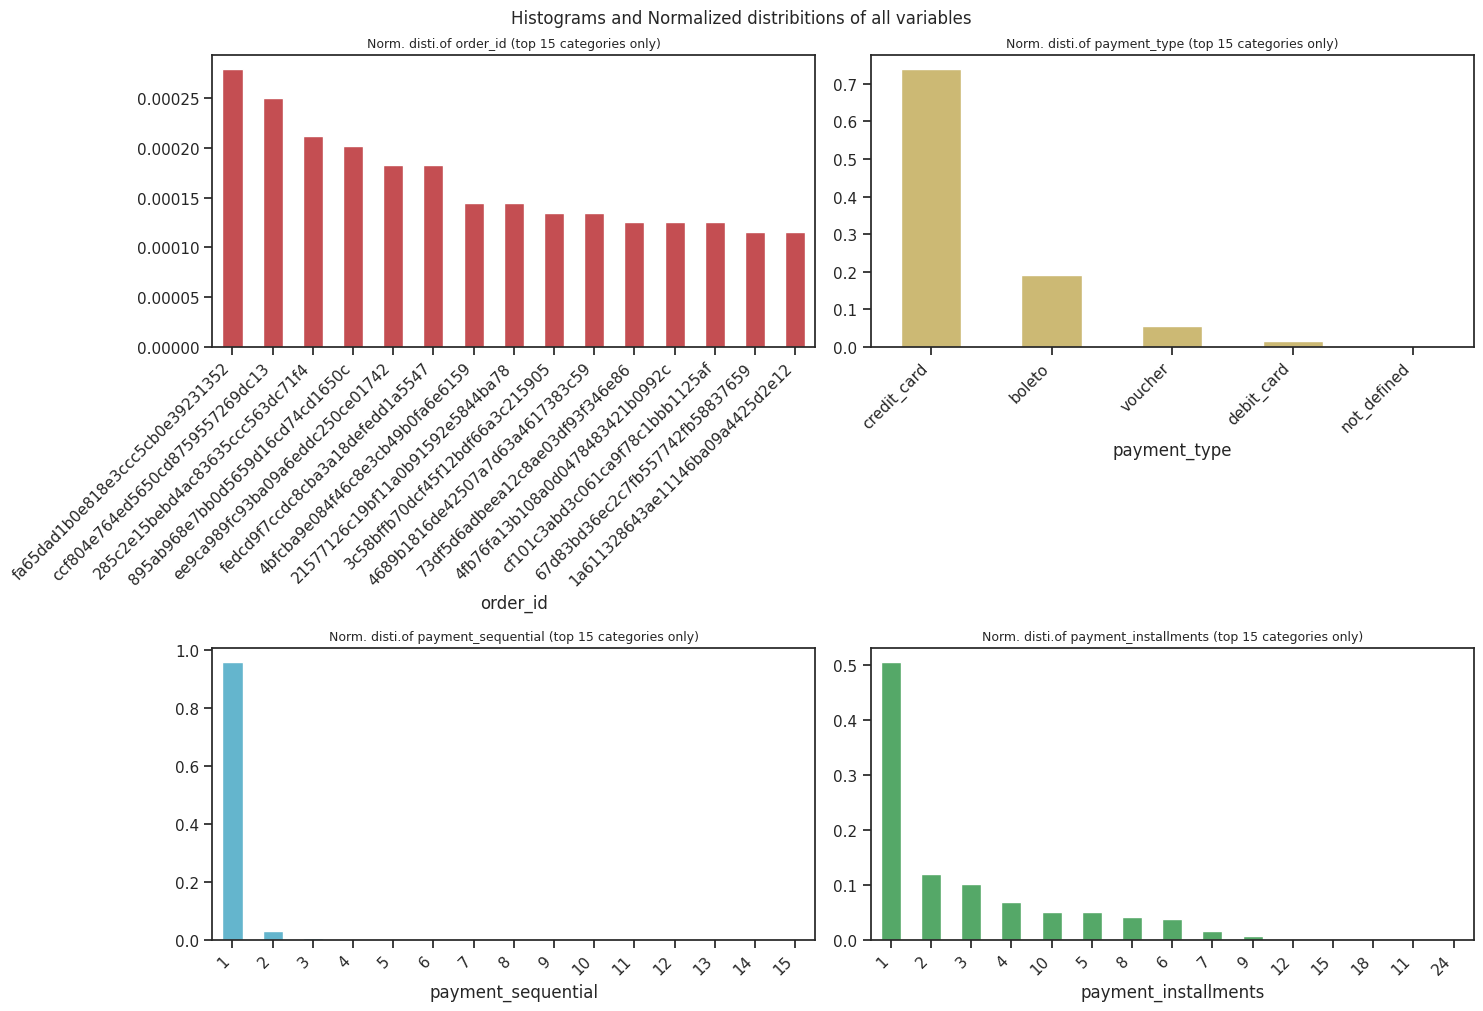

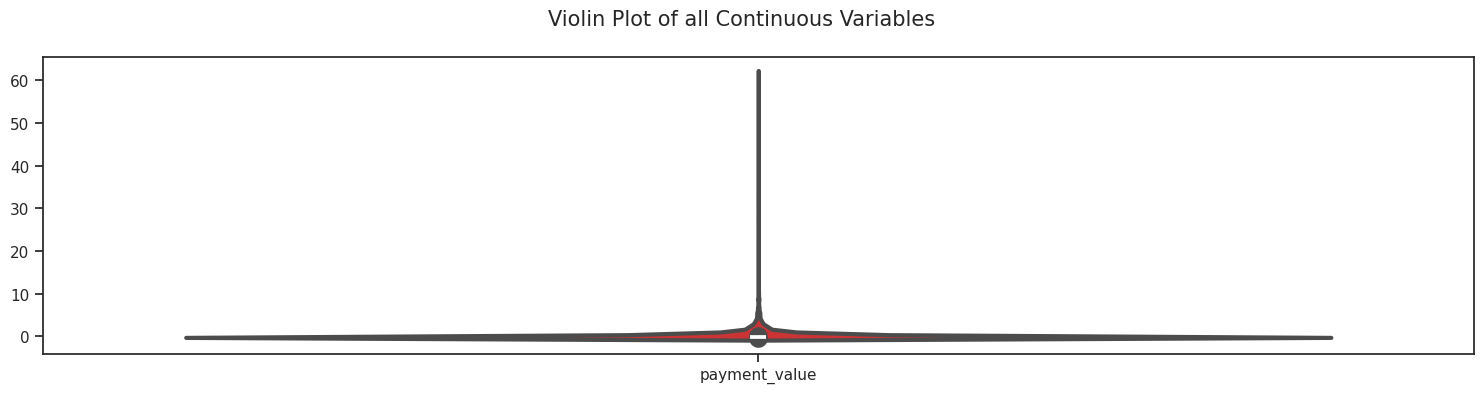

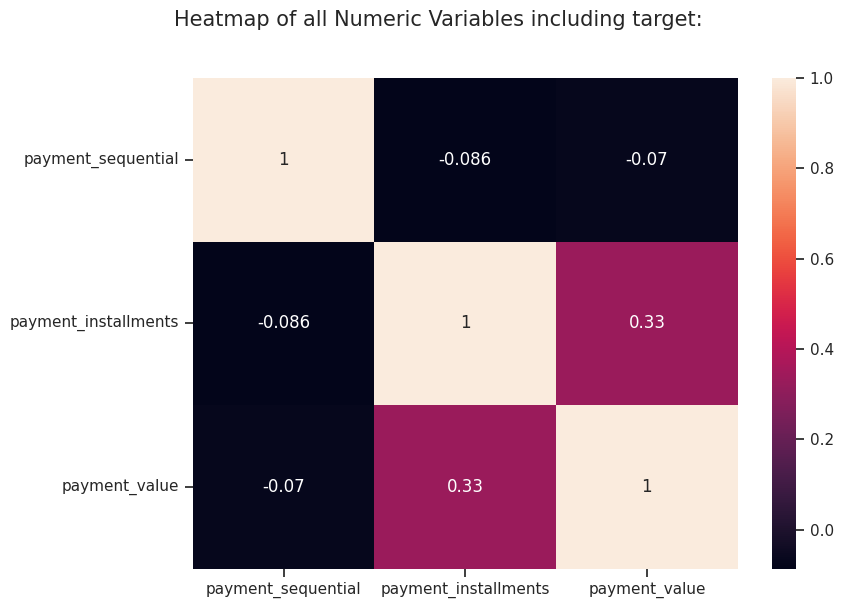

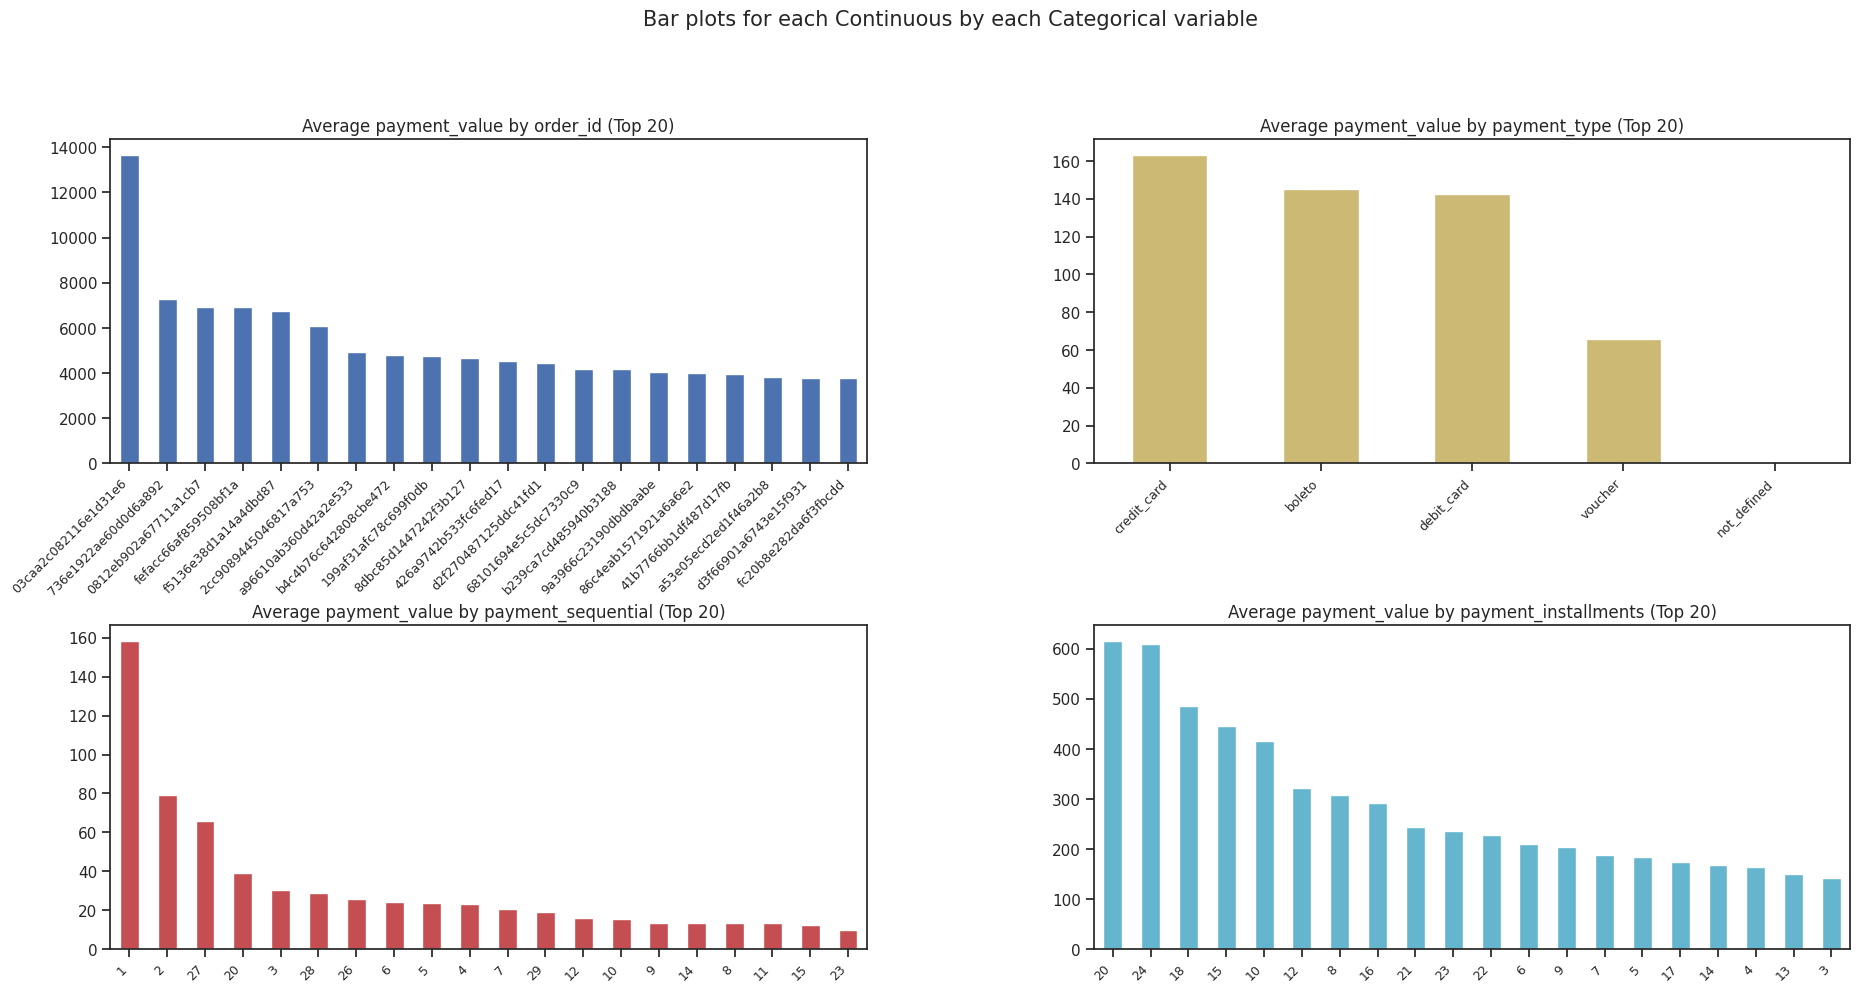

All Plots done
Time to run AutoViz = 5 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [34]:
# rapide eda de olist_order_payments_dataset
dfte = AV.AutoViz(olist_order_payments_dataset, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=len(olist_order_payments_dataset),max_cols_analyzed=len(olist_order_payments_dataset.columns), save_plot_dir=None)


Il est important de souligner que pour le cas du paiement dans ``olist_order_paiement_dataset``, il y a 2 cas de figure:

- Cas 1 : Paiement une fois, simple : en une ligne
- Cas 2 : Paiement en 6 fois (mensualités par exemple) mais en une ligne 
- Cas 3 : Paiement avec 2 moyens de paiement avec deux lignes (une ligne pour chaque de paiement)


In [ ]:
if len(olist_order_payments_dataset) == olist_order_payments_dataset.order_id.nunique():
    print("order_id est très probablement la clé primaire")
else:
    print("order_id est probablement une clé étrangère, la clé primaire est sûrement déclarée par une order_payment_id")

order_id est probablement une clé étrangère, la cléprimaire est sûrement déclarée par une order_payment_id


**Testons un paiement avec plusieurs payment_sequentials (par exemple 5)**

In [14]:
olist_order_payments_dataset[olist_order_payments_dataset.payment_sequential == 4].head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
121,ea9184ad433a404df1d72fa0a8764232,4,voucher,1,22.49
826,e6a66a8350bb88497954d37688ab123e,4,voucher,1,8.24
1200,53177d318c723e378c2a2aa1e9b2ea8e,4,voucher,1,20.00
1810,cafe257a6af47e3a0f99d202c0bbdbf4,4,voucher,1,1.63
2638,8b1386c62489fa3207c75cddb43f7e5d,4,voucher,1,0.39


In [17]:
vc = olist_order_payments_dataset.order_id.value_counts()
order_id_with_4_rows = vc[vc==4].index.tolist()
print(f"Liste des id commandes sur plusieurs lignes :", "\n",order_id_with_4_rows)

Liste des id commandes sur plusieurs lignes : 
 ['5b03dc75d71e4a3940c88c4c9cdf6c2c', '499062ee7ee19172573b081758302721', '94aa11237bc16075072bb3569a0bf5c5', '54e9851195e7b44a91adc2564e4d082c', '458ce9ed0016410eb81b196544fd987f', 'cac1850fae99ea24a8186fad4db365bb', '086cb9cd0cf7067d77fe09f31620a52b', '6064862631581009b8eb676bc264d91f', '1f66126a353c1308d1396bec7cf67f37', '0aea5ed8df108f7cb387c099ddec65c2', '99a3d4b1228bc02abf9eec5d9a7a742d', 'de06e436fbb3dd6e10bafb5f24ed5530', '3206db48a35131540e67f96b35a30ceb', '8b1386c62489fa3207c75cddb43f7e5d', '59798edc300f7563a9bdf18b2740def9', '9a2e51589ecc5ce80f0403a55a8f789c', '707c7403d5d131e75e3d557bdd0646c4', 'cf7b757fbc81196ad9916c519c092321', '69f54f52631eb8ea8bec66cb902cf54e', 'ef8e8348ba291917542268f900fac505', '2fac55edfd9754d1a0e7ecc67d48d08d', '4f0b86c3487e56b6e9594e9dfdb5d70c', 'b20687804070fdfcbb7a183e9dd0cc1b', '102dff93d9ff9180027b57feff2f34cc', '0fa927b252421189a0e0d5725fb3832d', '499689fc885e9c2bb31f4a13fc67f499', '527f95bc978265

In [58]:
# pick the first and have a look of how it behaves
olist_order_payments_dataset[olist_order_payments_dataset.order_id == order_id_with_4_rows[0]]

,order_id,payment_sequential,payment_type,payment_installments,payment_value
38693,5b03dc75d71e4a3940c88c4c9cdf6c2c,1,voucher,1,11.48
59218,5b03dc75d71e4a3940c88c4c9cdf6c2c,3,voucher,1,20.00
70953,5b03dc75d71e4a3940c88c4c9cdf6c2c,4,voucher,1,14.70
74603,5b03dc75d71e4a3940c88c4c9cdf6c2c,2,voucher,1,20.00


In [60]:
help(pd.DataFrame.sort_values)

Help on function sort_values in module pandas.core.frame:

sort_values(self, by: 'IndexLabel', *, axis: 'Axis' = 0, ascending: 'bool | list[bool] | tuple[bool, ...]' = True, inplace: 'bool' = False, kind: 'SortKind' = 'quicksort', na_position: 'str' = 'last', ignore_index: 'bool' = False, key: 'ValueKeyFunc | None' = None) -> 'DataFrame | None'
    Sort by the values along either axis.

    Parameters
    ----------
    by : str or list of str
        Name or list of names to sort by.

        - if `axis` is 0 or `'index'` then `by` may contain index
          levels and/or column labels.
        - if `axis` is 1 or `'columns'` then `by` may contain column
          levels and/or index labels.
    axis : "{0 or 'index', 1 or 'columns'}", default 0
         Axis to be sorted.
    ascending : bool or list of bool, default True
         Sort ascending vs. descending. Specify list for multiple sort
         orders.  If this is a list of bools, must match the length of
         the by.
    

In [61]:
order_id_with_10_rows = vc[vc==10].index.tolist()
olist_order_payments_dataset[olist_order_payments_dataset.order_id == order_id_with_10_rows[0]].sort_values(by="payment_sequential", ascending=True)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
14214,364f451ee38a4268d7c15d317021eb35,1,voucher,1,29.89
60571,364f451ee38a4268d7c15d317021eb35,2,voucher,1,14.17
93841,364f451ee38a4268d7c15d317021eb35,3,voucher,1,13.64
42716,364f451ee38a4268d7c15d317021eb35,4,voucher,1,38.99
9910,364f451ee38a4268d7c15d317021eb35,5,voucher,1,3.64
8390,364f451ee38a4268d7c15d317021eb35,6,voucher,1,16.25
97431,364f451ee38a4268d7c15d317021eb35,7,voucher,1,14.30
4576,364f451ee38a4268d7c15d317021eb35,8,voucher,1,14.82
44266,364f451ee38a4268d7c15d317021eb35,9,voucher,1,6.96
18778,364f451ee38a4268d7c15d317021eb35,10,voucher,1,1.58


On comprend que peu importe le nombre de fois déjà payer pour la même commande, le type de paiement utilisé, la table order_payment_dataset donne :
- l'ensemble des paiements effectués sur la base du paiement choisi à date de notre étude (ce qui correspond aux données de Monetary).

In [18]:
order_id_with_29_rows = vc[vc==29].index.tolist()
olist_order_payments_dataset[olist_order_payments_dataset.order_id == order_id_with_29_rows[0]].sort_values(by="payment_sequential", ascending=True)


,order_id,payment_sequential,payment_type,payment_installments,payment_value
14321,fa65dad1b0e818e3ccc5cb0e39231352,1,voucher,1,3.71
23074,fa65dad1b0e818e3ccc5cb0e39231352,2,voucher,1,8.51
65641,fa65dad1b0e818e3ccc5cb0e39231352,3,voucher,1,2.95
9985,fa65dad1b0e818e3ccc5cb0e39231352,4,voucher,1,29.16
28330,fa65dad1b0e818e3ccc5cb0e39231352,5,voucher,1,0.66
29648,fa65dad1b0e818e3ccc5cb0e39231352,6,voucher,1,5.02
82593,fa65dad1b0e818e3ccc5cb0e39231352,7,voucher,1,0.32
68853,fa65dad1b0e818e3ccc5cb0e39231352,8,voucher,1,26.02
17274,fa65dad1b0e818e3ccc5cb0e39231352,9,voucher,1,1.08
19565,fa65dad1b0e818e3ccc5cb0e39231352,10,voucher,1,12.86


In [19]:
olist_order_payments_dataset[olist_order_payments_dataset.order_id == order_id_with_29_rows[0]].payment_value.sum()

np.float64(457.99)

In [128]:
payment_group = olist_order_payments_dataset.groupby("order_id")

In [129]:
payment_group.payment_value.sum().sort_values(ascending=False)

order_id
03caa2c082116e1d31e67e9ae3700499    13664.08
736e1922ae60d0d6a89247b851902527     7274.88
0812eb902a67711a1cb742b3cdaa65ae     6929.31
fefacc66af859508bf1a7934eab1e97f     6922.21
f5136e38d1a14a4dbd87dff67da82701     6726.66
                                      ...   
e8bbc1d69fee39eee4c72cb5c969e39d       10.07
f1d5c2e6867fa93ceee9ef9b34a53cbf        9.59
c8c528189310eaa44a745b8d9d26908b        0.00
4637ca194b6387e2d538dc89b124b0ee        0.00
00b1cb0320190ca0daa2c88b35206009        0.00
Name: payment_value, Length: 99440, dtype: float64

Il existe de commande dont le payment a été annulé probablement:


In [140]:
payment = payment_group.payment_value.sum().sort_values(ascending=False)
payment_zero_index = payment.where(payment.values==0).dropna().index.tolist()
print(payment_zero_index)


['c8c528189310eaa44a745b8d9d26908b', '4637ca194b6387e2d538dc89b124b0ee', '00b1cb0320190ca0daa2c88b35206009']


## **Order Items dataset** 

In [20]:
olist_order_items_dataset_path = repo_wd / "data/raw/olist_order_items_dataset.csv"
olist_order_items_dataset = pd.read_csv(olist_order_items_dataset_path)
olist_order_items_dataset.head()


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [21]:
print(f"Le nombre d'id produit unique est de : {olist_order_items_dataset.product_id.nunique()}", "\n")
print(f"Le nombre de commande concerné : {olist_order_items_dataset.order_id.nunique()}" )

Le nombre d'id produit unique est de : 32951 

Le nombre de commande concerné : 98666


In [23]:
olist_order_items_dataset.dtypes

order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
freight_value          float64
dtype: object

In [24]:
for col in olist_order_items_dataset.columns:
    if olist_order_items_dataset[col].dtype == object:
        if col == "shipping_limit_date": # transforme to timestamp
            olist_order_items_dataset[col] = pd.to_datetime(olist_order_items_dataset[col])
        else:
            olist_order_items_dataset[col] = olist_order_items_dataset[col].astype('category')

In [25]:
olist_order_items_dataset.dtypes

order_id                     category
order_item_id                   int64
product_id                   category
seller_id                    category
shipping_limit_date    datetime64[ns]
price                         float64
freight_value                 float64
dtype: object

In [64]:
olist_order_items_dataset[olist_order_items_dataset.order_id == order_id_with_29_rows[0]]


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
110202,fa65dad1b0e818e3ccc5cb0e39231352,1,1aecdb5fa3add74e385f25c6c527a462,06532f10282704ef4c69168b914b77be,2017-04-27 09:10:13,392.55,65.44


Montant payé dans le dataset ``order_items`` pour la commande **"fa65dad1b0e818e3ccc5cb0e39231352"**

In [ ]:
amount_df = olist_order_items_dataset[olist_order_items_dataset.order_id == order_id_with_29_rows[0]]
amount = amount_df.price * amount_df.order_item_id + amount_df.freight_value
print(f"Le montant de la commande {order_id_with_29_rows[0]} : {amount.values[0]:.2f}")

Le montant de la commande fa65dad1b0e818e3ccc5cb0e39231352 : 457.99


In [72]:
olist_order_items_dataset

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


**Bon à savoir**
---
Le order_id = 00143d0f86d6fbd9f9b38ab440ac16f5 a 3 articles (same product). chaque item a des frais de fret calculés selon la taille du colis et son poids. Afin de calculer le montant total des frais pour chaque commande, il faut juste faire la somme des frais de chaque article.

Par exemple: 
soit le prix d'un article, le total order_item pour trois est : ``21.33 * 3 = 63.99``

Le total des frais est : ``15.10 * 3 = 45.30``

La commande revient alors au client de (product + freight) : ``45.30 + 63.99 = 109.29``

**Il convient alors de généraliser le calcul du montant total par commande.**

**Recherche d'une commande généralisée()**

Profil de la commande :
- différents articles 
- le nombre d'article > 1



In [80]:
# Recherche par commande en tenant compte des order_item_id
amount = (amount_df.price + amount_df.freight_value) # ici c'est le cas spécifique pour un seul article dans une commande
float(amount.values)

457.99

Nous considérons les attributs ``'order_id', 'order_item_id', 'price', 'freight_value'`` de ce nouveau dataset ``olist_order_items_dataset_df``pour résolution du clustering dans de l'application de RFM marketing.

In [112]:
olist_order_items_dataset_df = \
                        olist_order_items_dataset[
                                                    ['order_id',
                                                        'order_item_id',
                                                        'price',
                                                        'freight_value']
                                                ] # car dans une commande il peut y avoir plusieurs produits identiques
olist_order_items_dataset_df.head()

,order_id,order_item_id,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,199.90,18.14


In [ ]:
olist_order_items_dataset_df_copy = olist_order_items_dataset_df.copy()
olist_order_items_dataset_df_copy['amount'] = olist_order_items_dataset_df_copy.price + \
            olist_order_items_dataset_df_copy.freight_value

In [ ]:
analytic_group = olist_order_items_dataset_df_copy.groupby(["order_id"])

In [116]:
monetary_df = analytic_group.agg(
    number_of_items=("order_item_id", "max"), # récupérer l'index max d'une commande
    total_amount=("amount", "sum")              # valeur d'une commande
)


In [117]:
monetary_df.reset_index(inplace=True, )
monetary_df.head(10)

,order_id,number_of_items,total_amount
0,00010242fe8c5a6d1ba2dd792cb16214,1,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,259.83
2,000229ec398224ef6ca0657da4fc703e,1,216.87
3,00024acbcdf0a6daa1e931b038114c75,1,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,218.04
5,00048cc3ae777c65dbb7d2a0634bc1ea,1,34.59
6,00054e8431b9d7675808bcb819fb4a32,1,31.75
7,000576fe39319847cbb9d288c5617fa6,1,880.75
8,0005a1a1728c9d785b8e2b08b904576c,1,157.60
9,0005f50442cb953dcd1d21e1fb923495,1,65.39


In [126]:
monetary_df.sort_values(by=["total_amount", "number_of_items"], ascending=[False, False]).head(10)

,order_id,number_of_items,total_amount
1455,03caa2c082116e1d31e67e9ae3700499,8,13664.08
44467,736e1922ae60d0d6a89247b851902527,4,7274.88
3130,0812eb902a67711a1cb742b3cdaa65ae,1,6929.31
98298,fefacc66af859508bf1a7934eab1e97f,1,6922.21
94439,f5136e38d1a14a4dbd87dff67da82701,1,6726.66
17114,2cc9089445046817a7539d90805e6e5a,6,6081.54
65046,a96610ab360d42a2e5335a3998b4718a,1,4950.34
69531,b4c4b76c642808cbe472a32b86cddc95,2,4809.44
9868,199af31afc78c699f0dbf71fb178d4d4,1,4764.34
54353,8dbc85d1447242f3b127dda390d56e19,1,4681.78


In [120]:
monetary_df.sort_values(by="number_of_items", ascending=False)

,order_id,number_of_items,total_amount
50137,8272b63d03f5f79c56e9e4120aec44ef,21,196.17
10459,1b15974a0141d54e36626dca3fdc731a,20,2202.40
65715,ab14fdcfbe524636d65ee38360e22ce8,20,2262.80
60941,9ef13efd6949e4573a18964dd1bbe7f5,15,783.00
25583,428a2f660dc84138d969ccd69a0ab6d5,15,1225.65
...,...,...,...
34639,5a082b558a3798d3e36d93bfa8ca1eae,1,24.23
34637,5a07264682e0b8fbb3f166edbbffc6e8,1,39.22
34636,5a071192a28951b76774e5a760c8c9b7,1,1005.43
34635,5a06fc966a12b41bf401b344464fd4b1,1,140.61


Il y a au moins un article pour chaque commande.
Seul la commande '``8272b63d03f5f79c56e9e4120aec44ef``' possède 21 lignes. Etudions de près cette commande

In [125]:
import duckdb as db
result = db.query(
    """
    select *
    from monetary_df
    order by total_amount desc
    limit 10;
    """
).df()

result.head(10)

,order_id,number_of_items,total_amount
0,03caa2c082116e1d31e67e9ae3700499,8,13664.08
1,736e1922ae60d0d6a89247b851902527,4,7274.88
2,0812eb902a67711a1cb742b3cdaa65ae,1,6929.31
3,fefacc66af859508bf1a7934eab1e97f,1,6922.21
4,f5136e38d1a14a4dbd87dff67da82701,1,6726.66
5,2cc9089445046817a7539d90805e6e5a,6,6081.54
6,a96610ab360d42a2e5335a3998b4718a,1,4950.34
7,b4c4b76c642808cbe472a32b86cddc95,2,4809.44
8,199af31afc78c699f0dbf71fb178d4d4,1,4764.34
9,8dbc85d1447242f3b127dda390d56e19,1,4681.78


Recherchons les commandes dont le paiement est ``nul`` dans la table des paiments `olist_order_payment`


In [166]:
print(payment_zero_index)

['c8c528189310eaa44a745b8d9d26908b', '4637ca194b6387e2d538dc89b124b0ee', '00b1cb0320190ca0daa2c88b35206009']


In [ ]:
payment_zero_index.append('f5136e38d1a14a4dbd87dff67da82701')

print(db.query(
    f"""
    select *
    from monetary_df
    where order_id IN {tuple(payment_zero_index)}
    limit 10;
    """
).df())

payment_zero_index.pop(len(payment_zero_index) - 1) # retirons la valeur ajoutée

               order_id              number_of_items  total_amount
0  f5136e38d1a14a4dbd87dff67da82701         1            6726.66  


'f5136e38d1a14a4dbd87dff67da82701'

On montre que les paiements nuls sont très probablement des commandes ayant été soit:
- annulées qui n'ont pas été approuvées par les vendeurs,
- ou annulées par le client lui-même
- abandonné n'ayant pas abouti 

La preuve ces commandes ne se trouvent pas dans la table des produits achetés `olist_order_items_dataset`

La table `order_dataset` pourrait nous en dire plus. Explorons cette table qui servira à la fois d'obtenir les features:
- frequency
- recency
utiles pour le clustering marketing RFM (afin d'analyse le comportement de nos clients)

## **Orders (facts table)**

In [152]:
olist_orders_dataset.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [27]:
olist_orders_dataset.dtypes

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

In [ ]:
olist_orders_dataset.order_purchase_timestamp = pd.to_datetime(olist_orders_dataset.order_purchase_timestamp)
olist_orders_dataset.order_approved_at = pd.to_datetime(olist_orders_dataset.order_approved_at)
olist_orders_dataset.order_delivered_carrier_date = pd.to_datetime(olist_orders_dataset.order_delivered_carrier_date)
olist_orders_dataset.order_delivered_customer_date = pd.to_datetime(olist_orders_dataset.order_delivered_customer_date)
olist_orders_dataset.order_estimated_delivery_date = pd.to_datetime(olist_orders_dataset.order_estimated_delivery_date)
olist_orders_dataset.order_id = olist_orders_dataset.order_id.astype("category")
olist_orders_dataset.customer_id = olist_orders_dataset.customer_id.astype("category")
olist_orders_dataset.order_status = olist_orders_dataset.order_status.astype("category")


In [29]:
olist_orders_dataset.dtypes

order_id                               category
customer_id                            category
order_status                           category
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

In [167]:
olist_orders_dataset.head(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09
7,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07
8,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,2017-01-23 18:29:09,2017-01-25 02:50:47,2017-01-26 14:16:31,2017-02-02 14:08:10,2017-03-06
9,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,delivered,2017-07-29 11:55:02,2017-07-29 12:05:32,2017-08-10 19:45:24,2017-08-16 17:14:30,2017-08-23


Shape of your Data Set loaded: (99441, 8)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  0
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  1
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  5
    Number of ID Columns =  2
    Number of Columns to Delete =  0
    8 Predictors classified...
        2 variable(s) removed since they were ID or low-information variables
        List of variables removed: ['order_id', 'customer_id']
Since Number of Rows in data 99441 exceed

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
order_id,category,0.000000,100,,,Possible ID column: drop before modeling step.
customer_id,category,0.000000,100,,,Possible ID column: drop before modeling step.
order_status,category,0.000000,0,,,"6 rare categories: ['canceled', 'unavailable', 'invoiced', 'processing', 'created', 'approved']. Group them into a single category or drop the categories."
order_purchase_timestamp,datetime64[ns],0.000000,99,,,Possible date-time colum: transform before modeling step.
order_approved_at,datetime64[ns],0.160899,91,,,"Possible date-time colum: transform before modeling step., 160 missing values. Impute them with mean, median, mode, or a constant value such as 123., Mixed dtypes: has 2 different data types:"
order_delivered_carrier_date,datetime64[ns],1.793023,81,,,"Possible date-time colum: transform before modeling step., 1783 missing values. Impute them with mean, median, mode, or a constant value such as 123., Mixed dtypes: has 2 different data types:"
order_delivered_customer_date,datetime64[ns],2.981668,96,,,"Possible date-time colum: transform before modeling step., 2965 missing values. Impute them with mean, median, mode, or a constant value such as 123., Mixed dtypes: has 2 different data types:"
order_estimated_delivery_date,datetime64[ns],0.000000,0,,,Possible date-time colum: transform before modeling step.


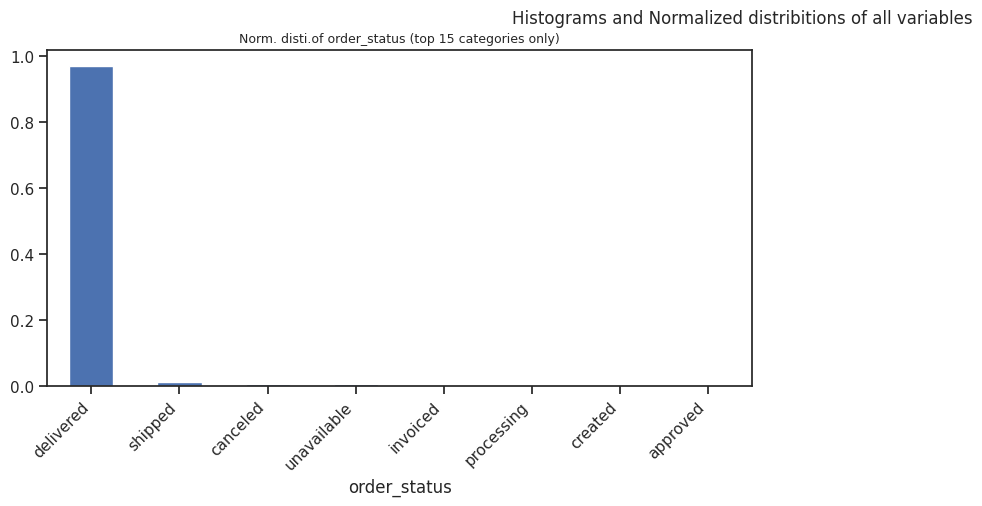

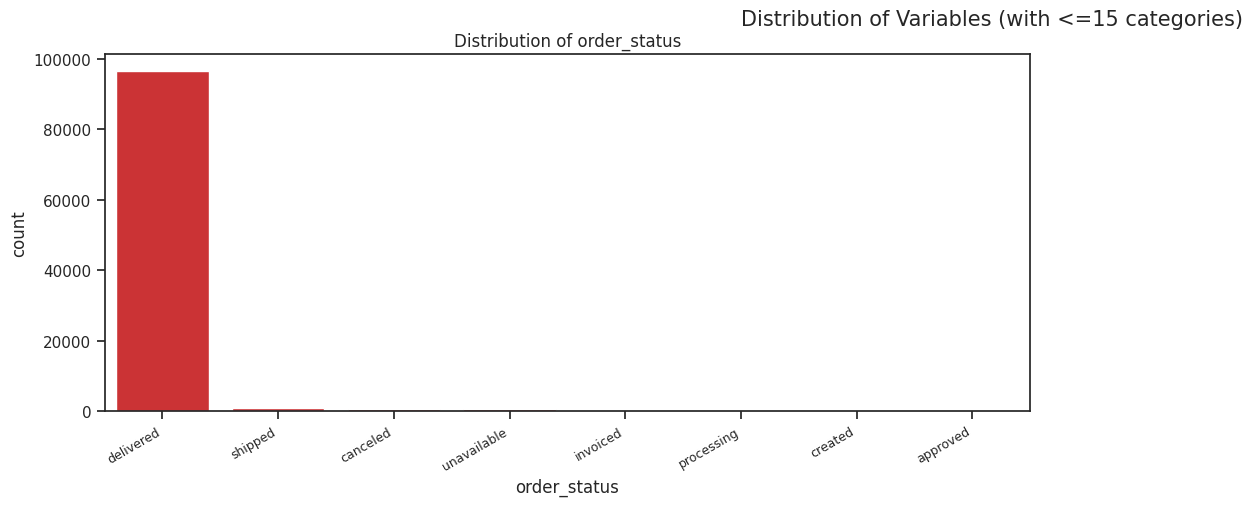

All Plots done
Time to run AutoViz = 7 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [ ]:
dfte_2 = AV.AutoViz(olist_orders_dataset, sep=',', depVar='',
                    dfte=None, header=0, verbose=1, lowess=False,
                    chart_format='svg',
                    max_rows_analyzed=len(olist_orders_dataset),
                    max_cols_analyzed=len(olist_orders_dataset.columns),
                    save_plot_dir=None)


In [ ]:
# Recapitulons
# taille de dans la table des faits
print(f"La taille du dataset olist_orders_dataset est : {olist_orders_dataset.shape}", "\n")
# nombre de commandes et de clients dans tables des faits
print(f"Le nombre de commandes enregistrées dans olist_orders_dataset (facts table) est : {olist_orders_dataset.order_id.nunique()}", "\n")
print(f"Le nombre de client enregistrées dans olist_orders_dataset (facts table) est : {olist_orders_dataset.customer_id.nunique()}")


La taille du dataset olist_orders_dataset est : (99441, 8) 

Le nombre de commandes enregistrées dans olist_orders_dataset (facts table) est : 99441 

Le nombre de client enregistrées dans olist_orders_dataset (facts table) est : 99441


Tous les clients de la table `customer_dataset` sont présent dans la table `order_dataset`.

? Mais quelles sont ces commandes qui:
- sont enregistrées dans la table ``order_payment`` quand ces commandes n'existent pas dans la table `order_items`


In [175]:
# log_normale pour visualiser les catégories quasi-inexistantes
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import lognorm

olist_orders_dataset.order_status.value_counts()

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64

In [179]:
help(lognorm.fit)

Help on method fit in module scipy.stats._continuous_distns:

fit(data, *args, **kwds) method of scipy.stats._continuous_distns.lognorm_gen instance
    Return estimates of shape (if applicable), location, and scale
    parameters from data. The default estimation method is Maximum
    Likelihood Estimation (MLE), but Method of Moments (MM)
    is also available.

    Starting estimates for the fit are given by input arguments;
    for any arguments not provided with starting estimates,
    ``self._fitstart(data)`` is called to generate such.

    One can hold some parameters fixed to specific values by passing in
    keyword arguments ``f0``, ``f1``, ..., ``fn`` (for shape parameters)
    and ``floc`` and ``fscale`` (for location and scale parameters,
    respectively).

    Parameters
    ----------
    data : array_like or `CensoredData` instance
        Data to use in estimating the distribution parameters.
    arg1, arg2, arg3,... : floats, optional
        Starting value(s) for a

In [180]:
shape, loc, scale = lognorm.fit(olist_orders_dataset.order_status.value_counts(), floc=0)
transformed = lognorm(s=shape, scale=scale).rvs(size=len(olist_orders_dataset.order_status.value_counts()))
order_status_lognorm = pd.DataFrame(data={
                            "frequency" : olist_orders_dataset.order_status.value_counts(),
                            "frequency_lognorm" : sorted(transformed, reverse=True)
                            }
                                    )

In [182]:
order_status_lognorm.reset_index(inplace=True)
order_status_lognorm

,order_status,frequency,frequency_lognorm
0,delivered,96478,2382.339990
1,shipped,1107,1165.116147
2,canceled,625,652.642050
3,unavailable,609,301.940454
4,invoiced,314,197.163435
5,processing,301,166.596540
6,created,5,3.185503
7,approved,2,0.173339


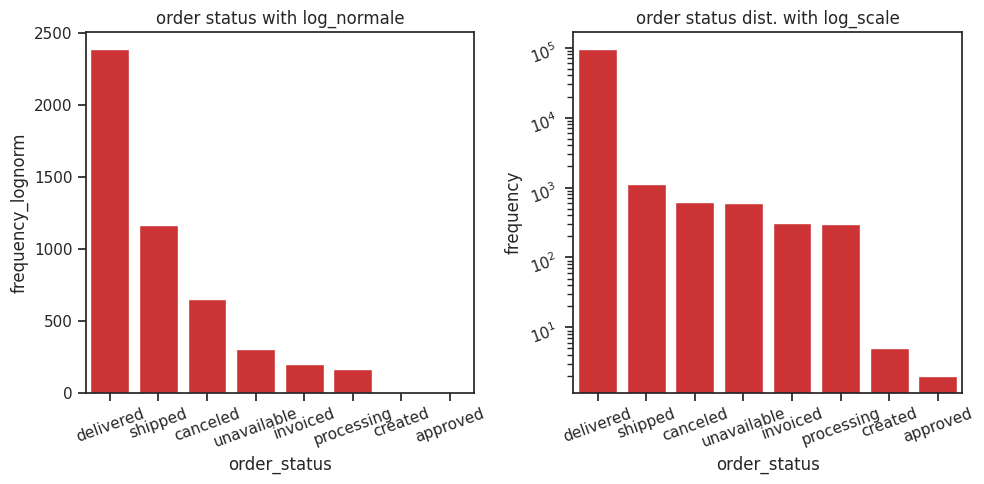

In [194]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

sns.barplot(x="order_status",
            y="frequency_lognorm",
            data=order_status_lognorm,
            order=order_status_lognorm["order_status"],
            ax=axs[0]
            )

sns.barplot(x="order_status",
            y="frequency",
            data=order_status_lognorm,
            order=order_status_lognorm["order_status"],
            ax=axs[1]
            )
axs[0].set_title("order status with log_normale")
axs[0].tick_params(axis="x",rotation=20)
axs[1].set_title("order status dist. with log_scale")
axs[1].tick_params(rotation=20)
axs[1].set_yscale("log")
plt.tight_layout()
plt.show()

In [196]:
order_status_lognorm.order_status.unique()

['delivered', 'shipped', 'canceled', 'unavailable', 'invoiced', 'processing', 'created', 'approved']
Categories (8, object): ['approved', 'canceled', 'created', 'delivered', 'invoiced', 'processing', 'shipped', 'unavailable']

Voici un flux proposé par l'IA (Qwen model) que je trouve cohérent qui permet de comprendre le fonctionnement des tables à différentes étapes d'une commande :

```
created → approved → processing → invoiced → shipped → delivered
     ↘ canceled / unavailable
```

Voici ce que signifient généralement les statuts dans un site e-commerce :

| Statut          | Signification                                                         | Impact général                                                                     |
| --------------- | --------------------------------------------------------------------- | ---------------------------------------------------------------------------------- |
| **created**     | La commande a été créée par le client mais n’a pas encore été traitée | Entrée initiale dans `order_dataset`                                               |
| **approved**    | La commande a été validée (paiement autorisé, stock réservé)          | On peut commencer à générer les lignes dans `order_items`, préparer la livraison   |
| **processing**  | La commande est en cours de préparation / traitement                  | Les items sont en stock et en préparation, possible interaction avec `order_items` |
| **invoiced**    | Une facture a été émise                                               | Lien avec `order_payment` : paiement enregistré ou facture générée                 |
| **shipped**     | La commande a quitté l’entrepôt                                       | Les informations sont complètes dans `order_items`, `order_payment` confirmées     |
| **delivered**   | La commande a été livrée au client                                    | Commande finalisée, stock et paiement clôturés                                     |
| **canceled**    | La commande a été annulée                                             | Aucune ligne dans `order_items` ou `order_payment` si annulée avant validation     |
| **unavailable** | Commande impossible à traiter (produit manquant ou rupture)           | Même conséquence que `canceled`, souvent jamais dans `order_items`                 |



Il ressort de ce qui précède que:

- Les statuts `canceled`, `created` et `unvailable` ne sont très probablement ni dans la table `order_payment` ni dans la table `order_items`.
- si la facture est émise (``invoiced``) alors les deux tables recoivent très probablement les données de commandes.
- ce qui est moins probable c'est le comportement des tables face aux statuts ``approved`` et ``processing``

In [203]:
print(f"Nombre de lignes pour order_status == 'approved' est de {len(olist_orders_dataset.query("""order_status == 'approved'"""))}", "\n", olist_orders_dataset.query("""order_status == 'approved'""").head(), "\n")
print(f"Nombre de lignes pour order_status == 'processing' est de {len(olist_orders_dataset.query("""order_status == 'processing'"""))}", "\n", olist_orders_dataset.query("""order_status == 'processing'""").head(), "\n")
print(f"Nombre de lignes pour order_status == 'invoiced' est de {len(olist_orders_dataset.query("""order_status == 'invoiced'"""))}", "\n", olist_orders_dataset.query("""order_status == 'invoiced'""").head(), "\n")
print(f"Nombre de lignes pour order_status == 'canceled' est de {len(olist_orders_dataset.query("""order_status == 'canceled'"""))}", "\n", olist_orders_dataset.query("""order_status == 'canceled'""").head(), "\n")
print(f"Nombre de lignes pour order_status == 'created' est de {len(olist_orders_dataset.query("""order_status == 'created'"""))}", "\n", olist_orders_dataset.query("""order_status == 'created'""").head(), "\n")
print(f"Nombre de lignes pour order_status == 'unvailable' est :  {len(olist_orders_dataset.query("""order_status == 'unvailable'"""))}", "\n", olist_orders_dataset.query("""order_status == 'unvailable'"""), "\n")


Nombre de lignes pour order_status == 'approved' est de 2 
                    order_id                        customer_id             \
44897  a2e4c44360b4a57bdff22f3a4630c173  8886130db0ea6e9e70ba0b03d7c0d286   
88457  132f1e724165a07f6362532bfb97486e  b2191912d8ad6eac2e4dc3b6e1459515   

      order_status order_purchase_timestamp  order_approved_at   \
44897   approved     2017-02-06 20:18:17    2017-02-06 20:30:19   
88457   approved     2017-04-25 01:25:34    2017-04-30 20:32:41   

      order_delivered_carrier_date order_delivered_customer_date  \
44897             NaT                           NaT                
88457             NaT                           NaT                

      order_estimated_delivery_date  
44897           2017-03-01           
88457           2017-05-22            

Nombre de lignes pour order_status == 'processing' est de 301 
                   order_id                        customer_id             \
128   15bed8e2fec7fdbadb186b57c46c92f2  f3f0e

In [367]:
olist_orders_dataset[olist_orders_dataset.order_approved_at.isnull()].head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaT,NaT,NaT,2018-09-12
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaT,NaT,NaT,2018-10-17
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaT,NaT,NaT,2017-04-10
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaT,NaT,NaT,2018-09-13
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaT,NaT,NaT,2017-05-30


In [213]:
olist_orders_dataset[olist_orders_dataset.order_delivered_carrier_date.isnull()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaT,NaT,2018-08-21
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaT,NaT,2017-10-03
266,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaT,NaT,2017-12-05
324,d3c8851a6651eeff2f73b0e011ac45d0,957f8e082185574de25992dc659ebbc0,processing,2016-10-05 22:44:13,2016-10-06 15:51:05,NaT,NaT,2016-12-09
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaT,NaT,2018-02-06
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaT,NaT,NaT,2018-09-27
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaT,NaT,2017-09-15


Olist pourrait utiliser le statut “processing” pour des raisons internes (retard, vérif paiement),et certaines commandes “processing” n’ont pas encore d’items.

Donc une partie des 301 commandes “processing” peuvent expliquer le delta 99441 - 98666 = 775 commandes.

In [ ]:
status = 'processing'
order_id_list = olist_orders_dataset.query(f"""order_status == '{status}'""").order_id.tolist()
print(order_id_list)

['15bed8e2fec7fdbadb186b57c46c92f2', 'd3c8851a6651eeff2f73b0e011ac45d0', '6a6c7d523fd59eb5bbefc007331af717', '745e1d4a7f8c4b548881788d4113bb1d', '1d52ba7197c7acebbb4f826f6585536f', 'd815bd2c2bdd79e4c0e0263caa986d66', '52b828f13e08788433adad4a7d135779', '56ab0ef6726f49b711b84ce62e305c7c', '4ea3508e2de6e58640c0efe3ef758829', '533e104c4193cf07d264603f7800fb71', '880835c91a5227560bdb8d0f45c60579', '369423839b4d9789d69665b7c2361443', 'db4d39113d1f1f359709384518d81e31', 'e2beeb3a428f811804079bc11b23c0c0', '1c54750859f8472306a0b63d74e782ef', 'fecc4ea5a3e06ce3192ae2f05b7a8439', '0fb3b7bbfc3693b115aa62a83fad2714', '881e6608d8b7f15fc4133a04c4933e48', '77de2b6b4ddbe44561245ee168593b5e', 'f3069a416e71d0fd68d9489752b6fe41', '042ce41927758767ec2aa0de06486b4c', '58b87ea5983b516a65c22435901c83a5', 'b741ced31205b787eebdd0cc7f220b0a', '6f91e4738284a9312089fd89f0d61648', '4c3c77b27f585da8c9e4629aba2f7817', '2e5c056e25f127f8554fa6a2ee1336a9', '8fb030b413de395dcbb7cb1a3c9b256e', '8d7bd36f24580dd73c1adff306

In [256]:
int(olist_orders_dataset.query(f"""order_status == 'canceled'""").order_status.value_counts().values[0])

625

In [224]:
items_order_id_list = olist_order_items_dataset.order_id.tolist() # from items_dataset
order_id_list = olist_orders_dataset.order_id.tolist() # from order_dataset

In [228]:
# liste des commandes non enregistré dans la table order_items
missing_orders = set(order_id_list) - set(items_order_id_list)
print(f"liste des commandes non enregistrées dans la table : {list(missing_orders)}" \
     , "\n", f"au nombre de {len(list(missing_orders))}")

liste des commandes non enregistrées dans la table : ['b6e63e74aff84a068fdc1b41e9ac29ea', '670e3b20191d3198a76069c8f9b12355', '29557adf1f00504612cbebf82c843d77', '63802c52ced9ff923c962ecbf4b3a2a2', 'e40d0c72305e1f0be6925df1e4378221', '7813842ae95e8c497fc0233232ae815a', '4ce5e2d15628c2277ca6ed81ee60f9de', '94aa3ae1cb5c1c152c6cc757b68bb659', 'b7be5e58fd37e6165dbb39e8362c8446', 'e5215415bb6f76fe3b7cb68103a0d1c0', '97b22dcad89f4916db427544e655d1b2', '752c0993c4993edea8eac33fda648244', '04b8c60eb3cceaecde917716daa30bde', 'a91e25d9e242b0545cddf83a2bb46954', '4317fe882d992cda2fb3d51baeb2751c', 'bc99558709784e3ae0b9f8dbff8c06f0', 'ab46182a322cb6dc83f4138d4e5cd73f', 'abfacef50a27d7cea3f2c7aa60c08245', '127f8f54e84665683a3c9bde5b3e768c', '2c885b285dce307562d7f4caae89c6dc', 'fbb8b95a779702d51ecf6fa530a997d4', '4d59cc2a2e7bb6c0a851725f5888a9b5', 'b44b36e6b69be34f58753d3b56d24001', '31f935babbc97f5990e0ffd128e19541', 'd8716a985f69a46751cc046b0fea0d98', 'a8ebe927b1b85cc950bba001cac770f7', '5226f1a73

In [ ]:
# Soit cette fonction pour répérer les order_id qui ne sont pas dans la table order_items

def search_missed_order_id(status: list, order_dataset, missed_order_id:str) -> pd.DataFrame:
    """check whether can explain order not saved in order_item dataset according to the order status
    Args:
        status : list of status in order_dataset
        order_dataset :
        missed_order_id : orders not saved in order_items but present in order_dataset
    """
    data = []
    for st in status:
        order_id_list = order_dataset.query(f"""order_status == '{st}'""").order_id.tolist()
        diff_order_id = list(set(missed_order_id) & set(order_id_list))
        nb_order = int(olist_orders_dataset.query(f"""order_status == '{st}'""") \
                                      .order_status.value_counts().values[0])
        data.append({
                     "order_status" : st,
                     "nb_order_in_order_table" : nb_order,
                     "order_not_in_items_table" : diff_order_id,
                     "nb_in_table_item" : nb_order - len(diff_order_id),
                     "nb_not_in_table_item" : len(diff_order_id),

        })

    return pd.DataFrame(data=data)


In [263]:
olist_orders_dataset.order_status.value_counts()

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64

### **Table recapitulative**

In [281]:
# contribution de chaque status dans les 775 commandes non enregistrées dans la table order_items
index_status = list(olist_orders_dataset.order_status.value_counts().index)
recap_table = search_missed_order_id(
    status=index_status,
    order_dataset=olist_orders_dataset,
    missed_order_id=missing_orders
)

display(recap_table)

,order_status,nb_order_in_order_table,order_not_in_items_table,nb_in_table_item,nb_not_in_table_item
0,delivered,96478,[],96478,0
1,shipped,1107,[a68ce1686d536ca72bd2dadc4b8671e5],1106,1
2,canceled,625,"[670e3b20191d3198a76069c8f9b12355, b6e63e74aff84a068fdc1b41e9ac29ea, 63802c52ced9ff923c962ecbf4b3a2a2, 2e9d8db9e132a9b5e1236618b7e8ef4a, a89abace0dcc01eeb267a9660b5ac126, 123e27a1a4d0b2481d8618ac3dff7d4e, 7813842ae95e8c497fc0233232ae815a, e5215415bb6f76fe3b7cb68103a0d1c0, 0d3adebce4bebc1f80a7f36e9833f497, 1ad22e16129698e1a3cc11e4350d2cb7, 252788350f9dad30b31847845fe119fe, 9abe82df39e950e1e0c1a5969e22571e, 672ab3776d5b25e586521469609ae774, 4d59cc2a2e7bb6c0a851725f5888a9b5, b44b36e6b69be34f58753d3b56d24001, 756fc608f67478946b31c752681f27be, c306eca42d32507b970739b5b6a5a33a, c549f0d88f33bfe43351b893f1fb55ac, 2b941f8e6ff81158a52de44909dc2a52, 0623dbbd06c0d4059dbfefab8748a491, 8d4c637f1accf7a88a4555f02741e606, 947e9c6bfd83a06953c420ef92d3da6e, 5226f1a731e8a1215da5e1bea64e2130, d1b4fc9a8c1207433519a8ec52e2d03f, 66e4a36ff490014773971a6ee0b6a0e4, 1857e77a4bad8abb2db929f107430663, 5a00b4d35edffc56b825c3646a99ba9d, ccd4eb95e68cb64e666ddcb84f8dfb1e, 383bb8b07361166ea86f3f4b51e96ff7, 236e6ec6171c1870d4bcf4ccfad87f49, 7a9d4c7f9b068337875b95465330f2fc, 6e98de3a85c84ead6689189b825d35b5, aed488062a3d349252ffe2961e214551, bd35b677fd239386e9861d11ae98ab56, 5b9680f27b5067afded00b23f9cb4d61, 00b1cb0320190ca0daa2c88b35206009, 227c804e2a44760671a6a5697ea549e4, 24b425b6d0f061fcb84c1832d221e3bb, 651a89e11653d8df43a624a903fe0f5e, 27667a063cb59b5d987a5a71c192cce5, 00d0ffd14774da775ac832ba8520510f, b059ee4de278302d550a3035c4cdb740, ed3efbd3a87bea76c2812c66a0b32219, 76d85afd545b8fc877273a68455675c1, 1aecadf4362edaca7fa033e882076c8d, 0a472c47d928bf4cd8b6a7a30345eeb7, df8282afe61008dc26c6c31011474d02, 8040bd2eb4b6e7cfcda94f1ccdcc703d, afed0d88ec7753e7be8744bb66e860d1, ba2821b49c92e278db491d3e19fa0556, bb8edfe0742a6a0279b7dff848289568, 7159096c5aa9be77f7f0c26c01ee9793, 74e198a81e758ec637a42e8f2e856927, 09f541f117ac3f665dc3aad6d3bb8fc9, 33fe1cb532ac16a48902980e00c26da6, 4a6c07557205c5dbdeae7e289af5c1c6, 94bce2ab6f38b41d29ebbd9d755677bf, 572c4bbf0f5f85a9b4a2c4fe0c7f04d5, 5d9e1e0e7084f2f9e90a7069e64cba61, 10a045cdf6a5650c21e9cfeb60384c16, 7dfff541b2a848ecb18ceb83d02bfa6a, c021ea4a80ce0d1bce358a2f831c34db, 52ffca67c47f7bc4350f82b1d2c20dec, 0cb763300f5679bee73a0b0fdfe0a2d2, 02e723e8edb4a123d414f56cc9c4665e, c5a468ae781ffb0ec6d36ae89fe512b0, 869997fbe01f39d184956b5c6bccfdbe, 93274b931b5771bd02154c9b716168ba, 7fd4b0e047195ca197c3660772a8d8c0, 4c8b9947280829d0a8b7e81cc249b875, 503e8daafed23dbae78ff210f2d41f0f, c49e86b525c30f1b55eaf9abbc9837a6, 392ed9afd714e3c74767d0c4d3e3f477, 6f3772f092a98dfbb37265f3186ba374, f4a8cf5dcabdbe8dd7e65e1674db3015, 2b68bb35779189904b0cd730eaba3d1d, 08662c478bed0444d0515925af759547, b642a3e08bfd10119c9b7e948c936e93, 47282cfe5747c1c19920f090e491d285, 3f6509ff22303ff04b9bf1b2c8bf69c6, 51192863a004d47d0e4f5bf5384bf88f, f81e71dd7c044a9ee7c1d6e37d68d64f, ddaec6fff982b13e7e048b627a11d6da, 8cacf6d8c088e18ca96ee6d5a138461b, d2bc174d5c413f457a21db6899afb682, 998b90bcfc77ff711912c1c14dcff885, 9bd5312d12f48b04a460f702baff3d8c, dd38e535112fb5094b53b1997c4eda52, e49e7ce1471b4693482d40c2bd3ad196, f86d7bc39aab05299691322044b63bb2, b17fd4c033b06e8d888de8ea6105ef9d, c581b368f1c9fc02caaa71e42809baf9, 0fb9645c128ac84788798f0129496ca7, 896fbd78a9ef3839b34b893f48f6bc67, 4b03319a5a065c83d4fcc4f18f8cb257, 3a3cddda5a7c27851bd96c3313412840, 3bd3b4d482f916c2c9662b8da6f2758b, 81b7c7bbc8ec003eeb67d87441a6a148, b13ea375fe9c728832688264638f84cf, b715c631fdd01580d9de3ed3759523c7, ...]",461,164
3,unavailable,609,"[29557adf1f00504612cbebf82c843d77, e40d0c72305e1f0be6925df1e4378221, 4ce5e2d15628c2277ca6ed81ee60f9de, b7be5e58fd37e6165dbb39e8362c8446, 94aa3ae1cb5c1c152c6cc757b68bb659, 97b22dcad89f4916db427544e655d1b2, 752c0993c4993edea8eac33fda648244, 04b8c60eb3cceaecde917716daa30bde, a91e25d9e242b0545cddf83a2bb46954, 4317fe882d992cda2fb3d51baeb2751c, ab46182a322cb6dc83f413

### **Tableau Recapitualtif des anomalies dans les tables**

In [279]:
recap_table[["order_status", "nb_order", "nb_in_table_item", "nb_not_in_table_item"]]

,order_status,nb_order,nb_in_table_item,nb_not_in_table_item
0,delivered,96478,96478,0
1,shipped,1107,1106,1
2,canceled,625,461,164
3,unavailable,609,6,603
4,invoiced,314,312,2
5,processing,301,301,0
6,created,5,0,5
7,approved,2,2,0


🟢 **Statuts cohérents avec de légères anomalies (data quality normale)** :

A ce titre on pourrait suggérer que ``approved``, ``processing``, ``delivered`` ont bien leurs enregistrements dans la table items.
De plus ``created`` ne soit pas encore enregistré, il l'est probablement après l'approbation de la commande. 

Qu'est ce qui pourrait alors justifier les incohérences et anomalies dans certains cas `unvailable`, `canceled`, `shipped`, `invoiced`? :

- 🟡 **Statuts cohérents avec de légères anomalies (data quality normale)**:

    shipped (1 cas), invoiced (2 cas)
    → erreurs opérationnelles, commandes test, suppressions tardives, latence d’ingestion.

- 🔴 **Statuts volontairement incohérents** :

    **canceled**
    → une commande peut être annulée avant ou après la création des items.
    → d’où deux populations différentes.

    **unavailable**
    → produit indisponible peut être détecté avant ou après la création des items.
    → la logique opérationnelle dépend du vendeur.


In [284]:
olist_order_payments_dataset.groupby("order_id").payment_value.sum().sort_values(ascending=False)

order_id
03caa2c082116e1d31e67e9ae3700499    13664.08
736e1922ae60d0d6a89247b851902527     7274.88
0812eb902a67711a1cb742b3cdaa65ae     6929.31
fefacc66af859508bf1a7934eab1e97f     6922.21
f5136e38d1a14a4dbd87dff67da82701     6726.66
                                      ...   
e8bbc1d69fee39eee4c72cb5c969e39d       10.07
f1d5c2e6867fa93ceee9ef9b34a53cbf        9.59
c8c528189310eaa44a745b8d9d26908b        0.00
4637ca194b6387e2d538dc89b124b0ee        0.00
00b1cb0320190ca0daa2c88b35206009        0.00
Name: payment_value, Length: 99440, dtype: float64

In [ ]:
display(monetary_df.sort_values(by=["total_amount", "number_of_items"], ascending=[False, False]))
print("\n", "Queue de la table `order_payment` :", "\n" )
display(olist_order_payments_dataset.groupby("order_id").payment_value.sum().sort_values(ascending=False).tail(8) )

,order_id,number_of_items,total_amount
1455,03caa2c082116e1d31e67e9ae3700499,8,13664.08
44467,736e1922ae60d0d6a89247b851902527,4,7274.88
3130,0812eb902a67711a1cb742b3cdaa65ae,1,6929.31
98298,fefacc66af859508bf1a7934eab1e97f,1,6922.21
94439,f5136e38d1a14a4dbd87dff67da82701,1,6726.66
...,...,...,...
21805,38bcb524e1c38c2c1b60600a80fc8999,1,11.62
27685,47d11383b93b217d96defbb2ef1a209b,1,11.56
21156,37193e64eb9a46b7f3197762f242b20a,1,10.89
89758,e8bbc1d69fee39eee4c72cb5c969e39d,1,10.07



 Queue de la table `order_payment` : 



order_id
38bcb524e1c38c2c1b60600a80fc8999    11.62
47d11383b93b217d96defbb2ef1a209b    11.56
37193e64eb9a46b7f3197762f242b20a    10.89
e8bbc1d69fee39eee4c72cb5c969e39d    10.07
f1d5c2e6867fa93ceee9ef9b34a53cbf     9.59
c8c528189310eaa44a745b8d9d26908b     0.00
4637ca194b6387e2d538dc89b124b0ee     0.00
00b1cb0320190ca0daa2c88b35206009     0.00
Name: payment_value, dtype: float64

In [ ]:
# vérifier si les commandes suivantes sont dans la table items
order_payment_agg = olist_order_payments_dataset.groupby("order_id") \
                                                            .payment_value.sum()
order_payment_null = order_payment_agg[order_payment_agg.values == 0].index.tolist()
print(order_payment_null)

['00b1cb0320190ca0daa2c88b35206009', '4637ca194b6387e2d538dc89b124b0ee', 'c8c528189310eaa44a745b8d9d26908b']


In [ ]:
set(order_payment_null) & set(monetary_df.order_id.values)

set()

On obtient un ensemble vide : ces commandes ne sont donc pas insérées dans la table ``order_items``.

Vérifions si toutes les commandes enregistrées dans la table items se retrouvent dans la table `order_payment` et que les valeurs des commandes sont cohérentes (identiques)...

In [ ]:
# order_items_table partage t-il les mêmes commandes?
len(set(olist_order_payments_dataset.order_id.values) & set(monetary_df.order_id.values)), len(monetary_df.order_id.values)

(98665, 98666)

Une commande manquante qui n'a pas été enregistré dans la ``tables des paiements`` quand bien même il ait été ajouté dans la ``table items``.


In [301]:
only_in_order_table = set(olist_orders_dataset.order_id.values) - set(olist_order_payments_dataset.order_id.values)
only_in_items_table = set(monetary_df.order_id.values) - set(olist_order_payments_dataset.order_id.values)

print(f"Commande se trouvant uniquement dans la table ``order_dataset`` mais pas dans la table `order_payment` : {only_in_order_table}")
print(f"Commande se trouvant uniquement dans la table ``order_items`` mais pas dans la table `order_payment` : {only_in_items_table}")

Commande se trouvant uniquement dans la table ``order_dataset`` mais pas dans la table `order_payment` : {'bfbd0f9bdef84302105ad712db648a6c'}
Commande se trouvant uniquement dans la table ``order_items`` mais pas dans la table `order_payment` : {'bfbd0f9bdef84302105ad712db648a6c'}


Etudions les attributs de cette commande dans le deux tables ``order_dataset`` et ``order_items``:

In [303]:
display(monetary_df.query("""order_id == '{}'""".format("bfbd0f9bdef84302105ad712db648a6c")))
display(olist_orders_dataset.query("""order_id == '{}'""".format("bfbd0f9bdef84302105ad712db648a6c")))

,order_id,number_of_items,total_amount
73845,bfbd0f9bdef84302105ad712db648a6c,3,143.46


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
30710,bfbd0f9bdef84302105ad712db648a6c,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04


In [366]:
len(missing_orders)

775

In [381]:
item_vs_payment_common_orders = set(olist_order_payments_dataset.order_id.values) & set(monetary_df.order_id.values)

In [382]:
'f5972017f8fc7597e9a878118ca8c19a' in item_vs_payment_common_orders

True

In [ ]:
payment_to_compare = order_payment_agg.loc[list(item_vs_payment_common_orders)]
items_to_compare = monetary_df[
    monetary_df.order_id.isin(item_vs_payment_common_orders)
    ].set_index('order_id').total_amount

# les valeurs d'order_payment_agg sont elles cohérentes pour les mêmes order_id
# partagées aussi dans la table order_items?

#payment_to_compare.values == items_to_compare.values

In [ ]:
# merge uniquement sur index order_id
df_compare = pd.concat(
    [items_to_compare, order_payment_agg],
    axis=1,
    join='inner'   # garde uniquement les index communs
)

df_compare.columns = ["items_amount", "payment_amount"]
df_compare

,items_amount,payment_amount
order_id,,
00010242fe8c5a6d1ba2dd792cb16214,72.19,72.19
00018f77f2f0320c557190d7a144bdd3,259.83,259.83
000229ec398224ef6ca0657da4fc703e,216.87,216.87
00024acbcdf0a6daa1e931b038114c75,25.78,25.78
00042b26cf59d7ce69dfabb4e55b4fd9,218.04,218.04
...,...,...
fffc94f6ce00a00581880bf54a75a037,343.40,343.40
fffcd46ef2263f404302a634eb57f7eb,386.53,386.53
fffce4705a9662cd70adb13d4a31832d,116.85,116.85


In [454]:
verif = df_compare.items_amount.round(0) == df_compare.payment_amount.round(0)
verif


order_id
00010242fe8c5a6d1ba2dd792cb16214    True
00018f77f2f0320c557190d7a144bdd3    True
000229ec398224ef6ca0657da4fc703e    True
00024acbcdf0a6daa1e931b038114c75    True
00042b26cf59d7ce69dfabb4e55b4fd9    True
                                    ... 
fffc94f6ce00a00581880bf54a75a037    True
fffcd46ef2263f404302a634eb57f7eb    True
fffce4705a9662cd70adb13d4a31832d    True
fffe18544ffabc95dfada21779c9644f    True
fffe41c64501cc87c801fd61db3f6244    True
Length: 98665, dtype: bool

In [455]:
print(sum(verif))
print(df_compare.items_amount.round(0).sum(), df_compare.payment_amount.sum().round(0).sum())

98407
15843876.0 15846280.0


Les aggrégations sont cohérentes sur 98407/98665 des commandes communes.

Une surestimation est faite lors de l'aggrégation dans la table paiements par rapport à la table des articles pour les commandes qu'elles ont en commun.

In [453]:
verif[verif.values == False].index

Index(['00789ce015e7e5791c7914f32bb4fad4', '016726239765c18f66826453f39c64e3',
       '01e51b7c3025655646143d09b911e1d7', '028aa7c930356788f861ed1b7f984819',
       '02f4dd90ba0feb8ec394cac05862d2b5', '033ccfbdfc4d29677b7e1e6df3a82820',
       '0345ba423eed2b009e0e407b19c422e4', '03b218d39c422c250f389120c531b61f',
       '04e00ba23c33890eaee39b02e8185cc2', '051fcda88d997d3ff86012da2a556342',
       ...
       'f44845a8eeec9bf829093ad92c846c09', 'f49de64f8655abdc94a86603570e10ec',
       'f51fb43d2d69e83cc9cca35f9706798b', 'f7d17bafe7c67afef77b8a96ad5abfd3',
       'fa0d5b3cb1f2221766145a60ba18ac64', 'fa87437f971fce498b2184cd2401e23e',
       'faf132fb35b3b3b533a67efbd6e7c02d', 'fbf352b18a26c6a86a53cca922facd25',
       'fd33085945f15975375cd8ec85440511', 'fdb034f444a32838124d8907e443d249'],
      dtype='object', name='order_id', length=258)

In [456]:
df_compare.loc[verif[verif.values == False].index]

,items_amount,payment_amount
order_id,,
00789ce015e7e5791c7914f32bb4fad4,168.83,190.81
016726239765c18f66826453f39c64e3,235.13,265.77
01e51b7c3025655646143d09b911e1d7,33.10,35.02
028aa7c930356788f861ed1b7f984819,57.53,62.94
02f4dd90ba0feb8ec394cac05862d2b5,130.96,141.65
033ccfbdfc4d29677b7e1e6df3a82820,59.96,69.26
0345ba423eed2b009e0e407b19c422e4,77.75,83.17
03b218d39c422c250f389120c531b61f,50.24,58.03
04e00ba23c33890eaee39b02e8185cc2,48.30,53.41


Ces différences semblent normales, elles peuvent être dues à des à des frais supplémentaires:
- Les Taxes (TVA, etc.), Frais de service ou autres charges.

Rappelons que les Frais de livraison sont déjà appliqués lors de la commande. 

Les montants finaux à ajouter à la tables RFM sont ceux de la table ``order_payment`` car elles représentent assurément 
la valeurs économique réelle de chaque client à travers leurs commandes


Encore une anomalie de cette commande qui a été livrée qui est dans la table des commandes et des articles mais qui n'a pas été enregistré dans la tables des paiements.

On comprend en avançant dans l'analyse que les tables ``paiements`` et ``articles`` se complètent.

Toutes les commandes dans la table :

- Un status Unvailable et Remboursé n'est pas une preuve d'incapacité de paiement du client : 

  - Le **status** ne saurait justifier l'exclusion de la commande de notre analyse de comportement RFM.




### **Actions pour conclure le pipeline de transformation et justifications**

Le statut de la commande ne doit pas entraîner son exclusion de l’analyse RFM, car :

1. **RFM mesure le comportement, pas la marge**

RFM analyse l’intention d’achat :
- Recency = engagement récent
- Frequency = répétition d’achat
- Monetary = capacité à dépenser
Une annulation ne change pas ce comportement initial.

2. **Un client qui annule reste un client engagé**

Les clients qui annulent ne sont pas de “mauvais clients” :
- ils montrent souvent un fort intérêt et une capacité d'achat élevée.

Les exclure fausserait la segmentation et ferait perdre des clients à potentiel.

3. **L’annulation est un problème opérationnel très probable, pas comportemental**

Retard, indisponibilité, problème vendeur…

➡️ Ce sont des défaillances d’Olist ou du marchand, pas du client.
Le client a bel et bien acheté, payé et montré une réelle intention.

4. **RFM doit rester cohérent avec le funnel d’achat**

RFM analyse la décision d'achat et le passage à l’action.

L’annulation arrive après ce comportement. Exclure ces commandes revient à ignorer une étape clé du parcours client.


***Nous tiendrons compte de chaque status et de toutes les commandes même annulées.***

In [ ]:
# vérfier si toutes les commandes sont horodatées à l'achat
olist_orders_dataset.order_purchase_timestamp.count(), olist_orders_dataset.shape[0]

(np.int64(99441), 99441)

Ok c'est le cas 

In [332]:
# besoin d'inclure "customer_id" car besoin d'agrégation par client
order_data = olist_orders_dataset[["order_id", "customer_id", "order_purchase_timestamp"]]
order_data

,order_id,customer_id,order_purchase_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:49
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,2017-11-18 19:28:06
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13 21:18:39
...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,2017-03-09 09:54:05
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,2018-02-06 12:58:58
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,2017-08-27 14:46:43
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,2018-01-08 21:28:27


In [ ]:
# check .days method
for method in dir(order_data.order_purchase_timestamp):
    if str(method).lower().__contains__("days"):
        print(method)
        break
else:
    print("Method not found")

Method not found


In [473]:
# recency en jour
order_data["recency"] = (order_data.order_purchase_timestamp.max() - \
                                order_data.order_purchase_timestamp).dt.days

order_data

,order_id,customer_id,order_purchase_timestamp,recency
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,380
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37,84
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:49,70
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,2017-11-18 19:28:06,332
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13 21:18:39,245
...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,2017-03-09 09:54:05,587
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,2018-02-06 12:58:58,253
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,2017-08-27 14:46:43,416
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,2018-01-08 21:28:27,281


In [470]:
payment_df = pd.DataFrame(data=order_payment_agg)
payment_df

,payment_value
order_id,
00010242fe8c5a6d1ba2dd792cb16214,72.19
00018f77f2f0320c557190d7a144bdd3,259.83
000229ec398224ef6ca0657da4fc703e,216.87
00024acbcdf0a6daa1e931b038114c75,25.78
00042b26cf59d7ce69dfabb4e55b4fd9,218.04
...,...
fffc94f6ce00a00581880bf54a75a037,343.40
fffcd46ef2263f404302a634eb57f7eb,386.53
fffce4705a9662cd70adb13d4a31832d,116.85


In [479]:
display(order_data.set_index("order_id"), payment_df, monetary_df.set_index("order_id"))

,customer_id,order_purchase_timestamp,recency
order_id,,,
e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,380
53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37,84
47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:49,70
949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,2017-11-18 19:28:06,332
ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13 21:18:39,245
...,...,...,...
9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,2017-03-09 09:54:05,587
63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,2018-02-06 12:58:58,253
83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,2017-08-27 14:46:43,416


,payment_value
order_id,
00010242fe8c5a6d1ba2dd792cb16214,72.19
00018f77f2f0320c557190d7a144bdd3,259.83
000229ec398224ef6ca0657da4fc703e,216.87
00024acbcdf0a6daa1e931b038114c75,25.78
00042b26cf59d7ce69dfabb4e55b4fd9,218.04
...,...
fffc94f6ce00a00581880bf54a75a037,343.40
fffcd46ef2263f404302a634eb57f7eb,386.53
fffce4705a9662cd70adb13d4a31832d,116.85


,number_of_items,total_amount
order_id,,
00010242fe8c5a6d1ba2dd792cb16214,1,72.19
00018f77f2f0320c557190d7a144bdd3,1,259.83
000229ec398224ef6ca0657da4fc703e,1,216.87
00024acbcdf0a6daa1e931b038114c75,1,25.78
00042b26cf59d7ce69dfabb4e55b4fd9,1,218.04
...,...,...
fffc94f6ce00a00581880bf54a75a037,1,343.40
fffcd46ef2263f404302a634eb57f7eb,1,386.53
fffce4705a9662cd70adb13d4a31832d,1,116.85


In [481]:
order_data.set_index("order_id", inplace=True), monetary_df.set_index("order_id", inplace=True)

(None, None)

In [483]:
order_data, monetary_df

(                                            customer_id             \
 order_id                                                             
 e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
 53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
 47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
 949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
 ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   
 ...                                                            ...   
 9c5dedf39a927c1b2549525ed64a053c  39bd1228ee8140590ac3aca26f2dfe00   
 63943bddc261676b46f01ca7ac2f7bd8  1fca14ff2861355f6e5f14306ff977a7   
 83c1379a015df1e13d02aae0204711ab  1aa71eb042121263aafbe80c1b562c9c   
 11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
 66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   
 
                                  order_purchase_timestamp  recency  
 orde

## **Choisir d'outil autre que pandas pour la fusion des données**

Compte tenu de l'évolution des données et d'un dataset certainement qui prendra du volume à mesure du temps
il faudra bien résoudre la question d'optimisation des performances des traitements avec les jointures des tables aggrégées.

C'es t dans ce cadre que nous étuliserons duckdb en lieu et place de pandas pour les croisements des données

🦆 1. **DuckDB est un moteur SQL vectorisé & massivement optimisé**

DuckDB = un moteur de base de données analytique embarqué dans Python, comme un “SQLite pour l’analytics”.

Il est conçu pour :

- gros volumes
- colonnes nombreuses
- opérations lourdes (groupby, joins, windows)
- performance C++ vectorisée
- multi-thread automatique

💥2. **Comparaison DuckDB vs Pandas**

| Fonction                    | Pandas       | DuckDB                       |
| --------------------------- | ------------ | ---------------------------- |
| Multithreading              | ❌ Non        | ✅ Oui                        |
| SQL complet                 | ❌ Non        | ✅ Oui                        |
| Window functions            | ⚠️ Complexe  | ✅ Direct `OVER()`            |
| Joins lourds                | 🐌 Lent      | ⚡ Très rapide                |
| GroupBy massifs             | 🐌 Lent      | ⚡ Très rapide                |
| In-memory columnar engine   | ❌ Non        | ✅ Oui                        |
| Lit fichiers parquet natifs | ❌ Conversion | ✅ Direct & rapide            |
| Scans paresseux (lazy)      | ❌ Non        | ⭐ Oui (DuckDB + Polars-like) |

Ainsi sa rapidité par rapport à pandas qui va être prioritaire pour les opérations lourdes.

## **Table reviews**

In [646]:
olist_orders_reviews_dataset_path = repo_wd / "data/raw/olist_order_reviews_dataset.csv"
olist_orders_reviews_dataset = pd.read_csv(olist_orders_reviews_dataset_path)
olist_orders_reviews_dataset = olist_orders_reviews_dataset[["order_id", "review_score"]]
olist_orders_reviews_dataset

,order_id,review_score
0,73fc7af87114b39712e6da79b0a377eb,4
1,a548910a1c6147796b98fdf73dbeba33,5
2,f9e4b658b201a9f2ecdecbb34bed034b,5
3,658677c97b385a9be170737859d3511b,5
4,8e6bfb81e283fa7e4f11123a3fb894f1,5
...,...,...
99219,2a8c23fee101d4d5662fa670396eb8da,5
99220,22ec9f0669f784db00fa86d035cf8602,5
99221,55d4004744368f5571d1f590031933e4,5
99222,7725825d039fc1f0ceb7635e3f7d9206,4


In [617]:
olist_orders_reviews_dataset.dtypes

order_id        object
review_score     int64
dtype: object

In [647]:
olist_orders_reviews_dataset.order_id = \
    olist_orders_reviews_dataset.order_id.astype("category")

olist_orders_reviews_dataset.dtypes

order_id        category
review_score       int64
dtype: object

Shape of your Data Set loaded: (99224, 2)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  0
    Number of Integer-Categorical Columns =  1
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  1
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    2 Predictors classified...
        No variables removed since no ID or low-information variables found in data set
To fix these data quality issues in the dataset, import FixDQ from autoviz...
There are 349 du

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
order_id,category,0.000000,99,,,98673 rare categories: Too many to list. Group them into a single category or drop the categories.
review_score,int64,0.000000,0,1.000000,5.000000,Column has 14541 outliers greater than upper bound (6.50) or lower than lower bound(2.50). Cap them or remove them.


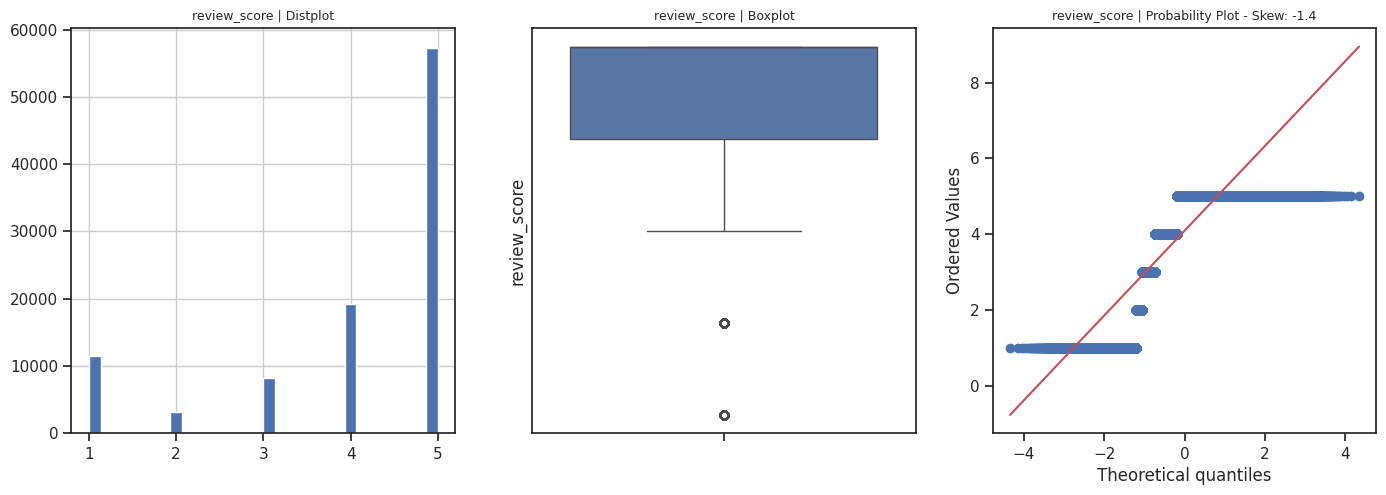

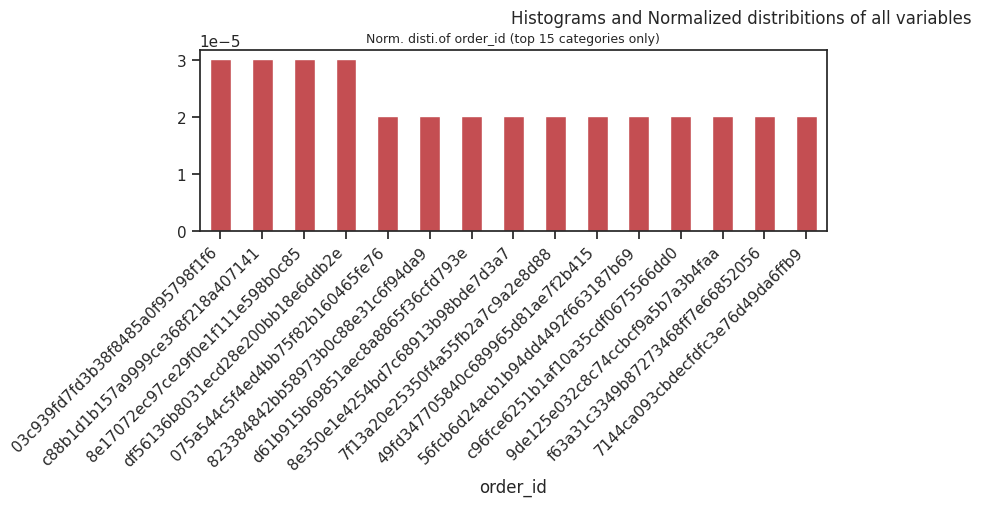

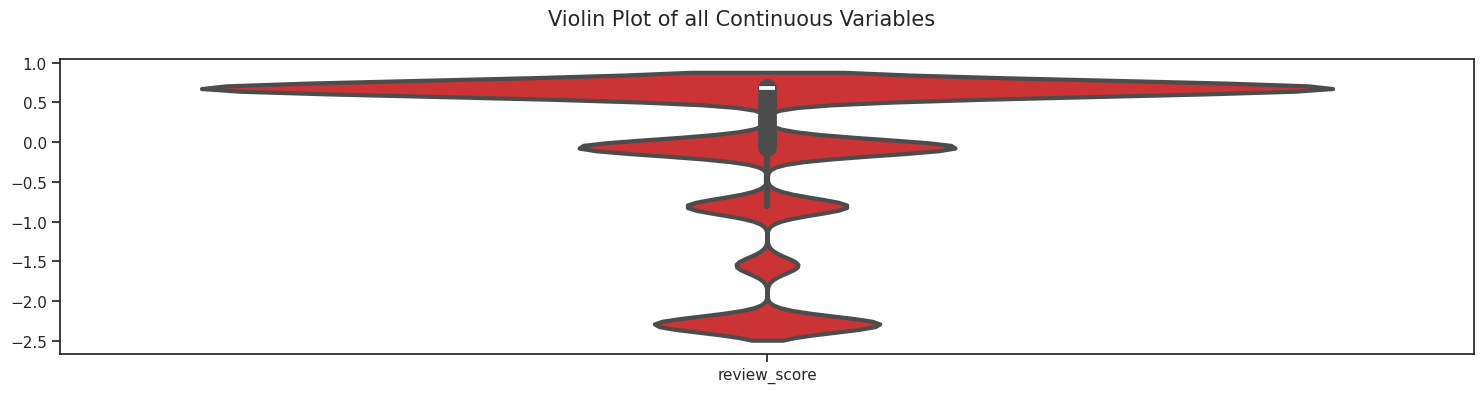

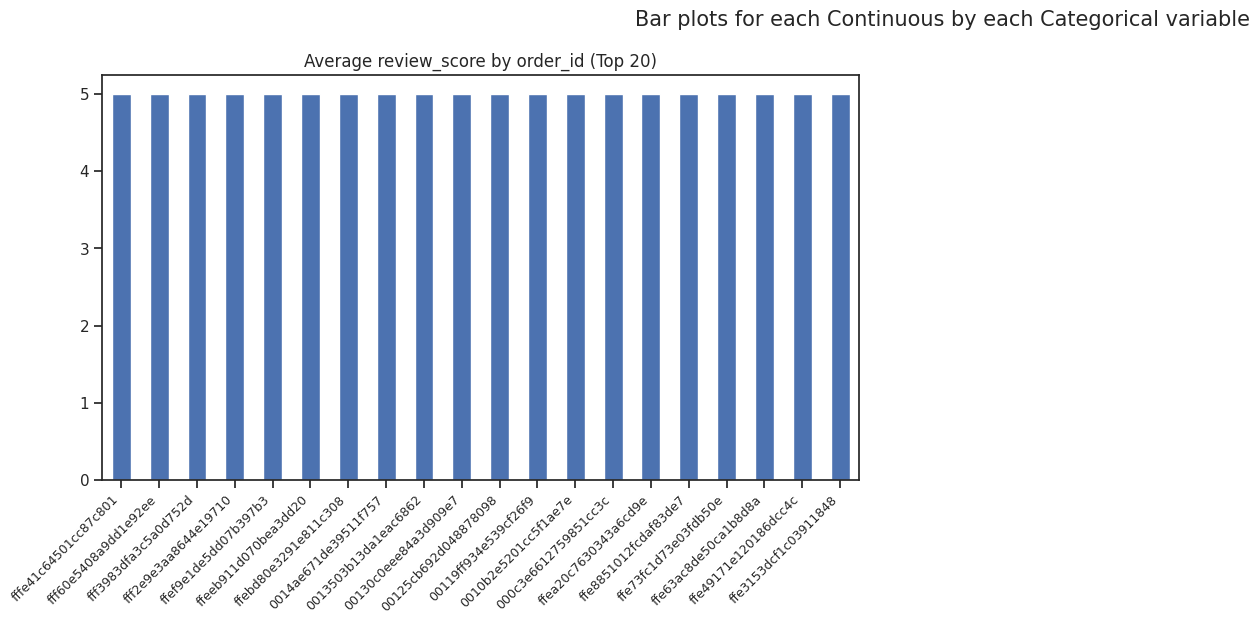

All Plots done
Time to run AutoViz = 3 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [632]:
dfte_3 = AV.AutoViz(olist_orders_reviews_dataset, sep=',', depVar='',
                    dfte=None, header=0, verbose=1, lowess=False,
                    chart_format='svg',
                    max_rows_analyzed=len(olist_orders_dataset),
                    max_cols_analyzed=len(olist_orders_dataset.columns),
                    save_plot_dir=None)

In [648]:
olist_orders_reviews_dataset.order_id.value_counts()

order_id
03c939fd7fd3b38f8485a0f95798f1f6    3
c88b1d1b157a9999ce368f218a407141    3
8e17072ec97ce29f0e1f111e598b0c85    3
df56136b8031ecd28e200bb18e6ddb2e    3
075a544c5f4ed4bb75f82b160465fe76    2
                                   ..
559115c14f48d999adcc027b4a702c8b    1
5590b14b260d2f61b2db5efb8d4a4601    1
5590b02a48dbcd875b82f7e97c4c5ddd    1
558fa371b24282233214767214895e95    1
5599a0eebfc7ecac5cffa25fe2d57e47    1
Name: count, Length: 98673, dtype: int64

On voit que chaque ``order_id`` plusieurs reviews peuvent être adressés à une seule commande.
 
Cela est possible que si la plateforme Olist permet un commentaire par article.

Nous ferons alors la moyenne des reviews par commande.

In [649]:
olist_orders_reviews_dataset = pd.DataFrame(
    olist_orders_reviews_dataset.groupby("order_id").review_score
             .mean().round(1)).reset_index().astype("category")

olist_orders_reviews_dataset

,order_id,review_score
0,00010242fe8c5a6d1ba2dd792cb16214,5.0
1,00018f77f2f0320c557190d7a144bdd3,4.0
2,000229ec398224ef6ca0657da4fc703e,5.0
3,00024acbcdf0a6daa1e931b038114c75,4.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,5.0
...,...,...
98668,fffc94f6ce00a00581880bf54a75a037,5.0
98669,fffcd46ef2263f404302a634eb57f7eb,5.0
98670,fffce4705a9662cd70adb13d4a31832d,5.0
98671,fffe18544ffabc95dfada21779c9644f,5.0


## **Jointure des données**
---

#### **Table RFM**


- **Avec Pandas** 

In [570]:
rm_data = order_data.join(payment_df).join(monetary_df) # jointure sur les index
rm_data = rm_data[["customer_id",	"order_purchase_timestamp",	"recency",	"payment_value", "total_amount"]]
rm_data

,customer_id,order_purchase_timestamp,recency,payment_value,total_amount
order_id,,,,,
e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,380,38.71,38.71
53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37,84,141.46,141.46
47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:49,70,179.12,179.12
949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,2017-11-18 19:28:06,332,72.20,72.20
ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13 21:18:39,245,28.62,28.62
...,...,...,...,...,...
9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,2017-03-09 09:54:05,587,85.08,85.08
63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,2018-02-06 12:58:58,253,195.00,195.00
83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,2017-08-27 14:46:43,416,271.01,271.01


In [571]:
rm_data.dtypes

customer_id                       category
order_purchase_timestamp    datetime64[ns]
recency                              int64
payment_value                      float64
total_amount                       float64
dtype: object

In [549]:
rm_data[rm_data.payment_value.isna()]

,customer_id,order_purchase_timestamp,recency,payment_value,total_amount
order_id,,,,,
bfbd0f9bdef84302105ad712db648a6c,86dc2ffce2dfff336de2f386a786e574,2016-09-15 12:16:38,762,NaN,143.46


In [ ]:
for_test = rm_data[rm_data.payment_value.isna()]
for_test.payment_value = round(for_test.payment_value.fillna(for_test.total_amount), 2)

for_test

,customer_id,order_purchase_timestamp,recency,payment_value,total_amount
order_id,,,,,
bfbd0f9bdef84302105ad712db648a6c,86dc2ffce2dfff336de2f386a786e574,2016-09-15 12:16:38,762,143.46,143.46


In [572]:
for_test.dtypes

customer_id                       category
order_purchase_timestamp    datetime64[ns]
recency                              int64
payment_value                      float64
total_amount                       float64
dtype: object

In [568]:
help(rm_data.reset_index)

Help on method reset_index in module pandas.core.frame:

reset_index(level: 'IndexLabel | None' = None, *, drop: 'bool' = False, inplace: 'bool' = False, col_level: 'Hashable' = 0, col_fill: 'Hashable' = '', allow_duplicates: 'bool | lib.NoDefault' = <no_default>, names: 'Hashable | Sequence[Hashable] | None' = None) -> 'DataFrame | None' method of pandas.core.frame.DataFrame instance
    Reset the index, or a level of it.

    Reset the index of the DataFrame, and use the default one instead.
    If the DataFrame has a MultiIndex, this method can remove one or more
    levels.

    Parameters
    ----------
    level : int, str, tuple, or list, default None
        Only remove the given levels from the index. Removes all levels by
        default.
    drop : bool, default False
        Do not try to insert index into dataframe columns. This resets
        the index to the default integer index.
    inplace : bool, default False
        Whether to modify the DataFrame rather than creat

In [573]:
rm_data.payment_value = rm_data.payment_value.fillna(rm_data.total_amount) # remplissage horizontal
rm_data = rm_data.drop(labels="total_amount", axis=1) # drop "total_amount" column
rm_data = rm_data.rename(columns={"payment_value": "monetary"})
rm_data = rm_data.reset_index()
rm_data.order_id = rm_data.order_id.astype("category")
rm_data


,order_id,customer_id,order_purchase_timestamp,recency,monetary
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,380,38.71
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37,84,141.46
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:49,70,179.12
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,2017-11-18 19:28:06,332,72.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13 21:18:39,245,28.62
...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,2017-03-09 09:54:05,587,85.08
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,2018-02-06 12:58:58,253,195.00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,2017-08-27 14:46:43,416,271.01
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,2018-01-08 21:28:27,281,441.16


In [575]:
rm_data.dtypes

order_id                          category
customer_id                       category
order_purchase_timestamp    datetime64[ns]
recency                              int64
monetary                           float64
dtype: object

In [566]:
rm_data[~rm_data.isna()]

,order_id,customer_id,order_purchase_timestamp,recency,monetary
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,380,38.71
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37,84,141.46
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:49,70,179.12
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,2017-11-18 19:28:06,332,72.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13 21:18:39,245,28.62
...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,2017-03-09 09:54:05,587,85.08
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,2018-02-06 12:58:58,253,195.00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,2017-08-27 14:46:43,416,271.01
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,2018-01-08 21:28:27,281,441.16


Toutes les colonnes sont remplies.

In [ ]:
# customer data
olist_customers_dataset

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [576]:
olist_customers_dataset.dtypes

customer_id                 category
customer_unique_id          category
customer_zip_code_prefix    category
customer_city               category
customer_state              category
dtype: object

In [580]:
# merge on customer_id
rm_data = rm_data.merge(
    olist_customers_dataset,
    how="inner",
    on="customer_id"
)

rm_data

,order_id,customer_id,order_purchase_timestamp,recency,monetary,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,380,38.71,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37,84,141.46,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:49,70,179.12,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,2017-11-18 19:28:06,332,72.20,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13 21:18:39,245,28.62,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP
...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,2017-03-09 09:54:05,587,85.08,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,2018-02-06 12:58:58,253,195.00,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,2017-08-27 14:46:43,416,271.01,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,2018-01-08 21:28:27,281,441.16,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ


**ADD Frequency**

In [ ]:
db.query(
    """
    select *
    from rm_data
    limit 10
    ;

    """
)

┌──────────────────────┬──────────────────────┬──────────────────────┬─────────┬──────────┬──────────────────────┬──────────────────────┬───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

In [608]:
rfm_duck_data = db.query(
    """
    WITH new_rm_data AS (
        SELECT
            customer_unique_id,
            order_id,
            recency,
            monetary,
            order_purchase_timestamp,
            CAST(customer_zip_code_prefix AS VARCHAR) AS customer_zip_code_prefix,
            customer_city,
            customer_state
        FROM rm_data
    )

    SELECT
            customer_unique_id,
            MIN(recency)                    AS recency,
            COUNT(customer_unique_id)       AS frequency,
            SUM(monetary)                   AS monetary,
            MAX(order_purchase_timestamp)   AS order_purchase_timestamp,
            MODE(customer_zip_code_prefix)  AS customer_zip_code_prefix,
            MODE(customer_city)             AS customer_city,
            MODE(customer_state)            AS customer_state

    FROM new_rm_data
    GROUP BY customer_unique_id
    ;

    """
    ).df()

rfm_duck_data

,customer_unique_id,recency,frequency,monetary,order_purchase_timestamp,customer_zip_code_prefix,customer_city,customer_state
0,831a032a3327e2b8325faf9d37953870,159,1,314.34,2018-05-11 16:35:19,13478,americana,SP
1,d4b1297d645ec19df4cd0af8cd6fe14a,214,1,59.18,2018-03-17 15:32:31,48410,cicero dantas,BA
2,dc184f142552a38189d5d5428d1984a6,236,1,222.68,2018-02-22 20:53:14,37410,tres coracoes,MG
3,1acfddcc366d45e07b84eedc46282cdc,66,1,264.22,2018-08-11 20:58:44,48990,andorinha,BA
4,79e12483f9b14c3254db94bd137a4b70,71,1,1480.73,2018-08-06 18:45:01,49047,aracaju,SE
...,...,...,...,...,...,...,...,...
96091,b88061f1247afd5ccd20f0c4a34d700c,155,1,19.39,2018-05-15 16:22:18,13183,hortolandia,SP
96092,a532fd54430dcef49c1f8dd838889158,78,1,173.32,2018-07-31 09:16:57,86990,marialva,PR
96093,dc2e3d8342b4ef33945a258ce631ab3f,261,1,63.10,2018-01-29 15:19:13,29024,vitoria,ES
96094,dd78e736826142c46dfba5d6ec8fd028,618,1,124.53,2017-02-05 18:54:57,5630,sao paulo,SP


### **Tables RFM + S(satisfaction) -> RFMS**


**Ces données d'études vont concerner uniquement les clients ayant données des avis sur des commandes particulières**

In [634]:
rm_data

,order_id,customer_id,order_purchase_timestamp,recency,monetary,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,380,38.71,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37,84,141.46,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:49,70,179.12,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,2017-11-18 19:28:06,332,72.20,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13 21:18:39,245,28.62,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP
...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,2017-03-09 09:54:05,587,85.08,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,2018-02-06 12:58:58,253,195.00,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,2017-08-27 14:46:43,416,271.01,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,2018-01-08 21:28:27,281,441.16,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ


In [650]:
rfms_data = rm_data.merge(
    olist_orders_reviews_dataset,
    how="left",
    on='order_id'
)

rfms_data

,order_id,customer_id,order_purchase_timestamp,recency,monetary,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,review_score
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,380,38.71,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,4.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37,84,141.46,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,4.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:49,70,179.12,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,5.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,2017-11-18 19:28:06,332,72.20,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,5.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13 21:18:39,245,28.62,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,5.0
...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,2017-03-09 09:54:05,587,85.08,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP,5.0
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,2018-02-06 12:58:58,253,195.00,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,4.0
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,2017-08-27 14:46:43,416,271.01,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,5.0
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,2018-01-08 21:28:27,281,441.16,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,2.0


In [653]:
rfms_data.review_score.value_counts(), rfms_data.review_score.isna().sum()

(review_score
 5.0    56955
 4.0    19018
 1.0    11316
 3.0     8136
 2.0     3125
 4.5       54
 2.5       34
 3.5       25
 1.5        8
 3.3        1
 4.3        1
 Name: count, dtype: int64,
 np.int64(768))

In [654]:
rfms_duck_data = db.query(
    """
    WITH new_rm_data AS (
        SELECT
            customer_unique_id,
            order_id,
            recency,
            monetary,
            review_score,
            order_purchase_timestamp,
            CAST(customer_zip_code_prefix AS VARCHAR) AS customer_zip_code_prefix,
            customer_city,
            customer_state
        FROM rfms_data
    )

    SELECT
            customer_unique_id,
            MIN(recency)                    AS recency,
            COUNT(customer_unique_id)       AS frequency,
            SUM(monetary)                   AS monetary,
            ROUND(AVG(review_score), 1)     AS review_score,
            MAX(order_purchase_timestamp)   AS order_purchase_timestamp,
            MODE(customer_zip_code_prefix)  AS customer_zip_code_prefix,
            MODE(customer_city)             AS customer_city,
            MODE(customer_state)            AS customer_state

    FROM new_rm_data
    GROUP BY customer_unique_id
    ;

    """
).df()

rfms_duck_data

,customer_unique_id,recency,frequency,monetary,review_score,order_purchase_timestamp,customer_zip_code_prefix,customer_city,customer_state
0,831a032a3327e2b8325faf9d37953870,159,1,314.34,5.0,2018-05-11 16:35:19,13478,americana,SP
1,d4b1297d645ec19df4cd0af8cd6fe14a,214,1,59.18,2.0,2018-03-17 15:32:31,48410,cicero dantas,BA
2,dc184f142552a38189d5d5428d1984a6,236,1,222.68,1.0,2018-02-22 20:53:14,37410,tres coracoes,MG
3,1acfddcc366d45e07b84eedc46282cdc,66,1,264.22,5.0,2018-08-11 20:58:44,48990,andorinha,BA
4,79e12483f9b14c3254db94bd137a4b70,71,1,1480.73,1.0,2018-08-06 18:45:01,49047,aracaju,SE
...,...,...,...,...,...,...,...,...,...
96091,84b7440c2a25a2d908e7226cbeb300e8,339,1,190.03,5.0,2017-11-12 12:47:01,78050,cuiaba,MT
96092,fc06116082a6e23a21072673c4eb12f3,591,1,38.68,5.0,2017-03-05 17:27:31,45700,itapetinga,BA
96093,b3be47a665b75181ac9728442d970dde,528,1,134.56,5.0,2017-05-07 12:47:57,38402,uberlandia,MG
96094,d468040bda183009e4ec5a3efb6350ae,348,1,63.37,5.0,2017-11-03 09:41:04,15390,itapura,SP


In [655]:
rfms_duck_data.dtypes

customer_unique_id                category
recency                              int64
frequency                            int64
monetary                           float64
review_score                       float64
order_purchase_timestamp    datetime64[ns]
customer_zip_code_prefix            object
customer_city                     category
customer_state                    category
dtype: object

In [657]:
rfms_duck_data.customer_zip_code_prefix = rfms_duck_data \
    .customer_zip_code_prefix.astype("category")

In [658]:
rfms_duck_data.dtypes

customer_unique_id                category
recency                              int64
frequency                            int64
monetary                           float64
review_score                       float64
order_purchase_timestamp    datetime64[ns]
customer_zip_code_prefix          category
customer_city                     category
customer_state                    category
dtype: object

In [663]:
rfms_duck_data.review_score.isna().sum()

np.int64(716)

In [662]:
rfms_silent_customers = rfms_duck_data[rfms_duck_data.review_score.isna()]
rfms_silent_customers.sort_values(by="frequency", ascending=False)


,customer_unique_id,recency,frequency,monetary,review_score,order_purchase_timestamp,customer_zip_code_prefix,customer_city,customer_state
8078,e2226f481eef03f2876d1a27f0f4b1b0,415,2,711.89,NaN,2017-08-28 15:14:21,11030,santos,SP
39395,79f227df52caf2b68d36e990ff3fc652,223,2,267.25,NaN,2018-03-07 22:11:47,27700,vassouras,RJ
31529,367f4686d7112d69feed92b02a1775ed,515,2,205.50,NaN,2017-05-19 18:13:54,88501,lages,SC
60583,2ca8ef8560c5cd0f9ddb65d1b1b51380,311,2,206.73,NaN,2017-12-09 17:59:48,51030,recife,PE
43917,c55821f6a2a59a93d4cde13a2ec14661,427,2,400.95,NaN,2017-08-16 13:10:42,78665,alto boa vista,MT
...,...,...,...,...,...,...,...,...,...
32563,94de5f7537d6020a50a292445530837e,541,1,115.39,NaN,2017-04-23 18:15:47,22765,rio de janeiro,RJ
32682,3cb7cb6096fea95c2bd5fadb04a6084f,589,1,29.62,NaN,2017-03-06 20:45:27,30110,belo horizonte,MG
32979,92b5ede4ff23756b5402ab835e70c887,279,1,285.00,NaN,2018-01-10 19:48:48,65970,porto franco,MA
33121,6f4102ac174b0bf17f1495f81a6f27a3,345,1,36.01,NaN,2017-11-06 14:17:00,88060,florianopolis,SC


In [664]:
rfms_active_reviewers = rfms_duck_data[~rfms_duck_data.review_score.isna()]
rfms_active_reviewers.sort_values(by="frequency", ascending=False)

,customer_unique_id,recency,frequency,monetary,review_score,order_purchase_timestamp,customer_zip_code_prefix,customer_city,customer_state
90212,8d50f5eadf50201ccdcedfb9e2ac8455,57,17,927.63,4.8,2018-08-20 19:14:26,4045,sao paulo,SP
45226,3e43e6105506432c953e165fb2acf44c,231,9,1172.66,2.8,2018-02-27 18:36:39,11701,praia grande,SP
9136,1b6c7548a2a1f9037c1fd3ddfed95f33,245,7,959.01,5.0,2018-02-14 13:22:12,38301,ituiutaba,MG
46802,ca77025e7201e3b30c44b472ff346268,138,7,1122.72,5.0,2018-06-01 11:38:29,51021,recife,PE
60506,6469f99c1f9dfae7733b25662e7f1782,111,7,758.83,5.0,2018-06-28 00:43:34,11065,santos,SP
...,...,...,...,...,...,...,...,...,...
32539,96e3b8a9735d1546fcea0053acfc9b04,453,1,149.48,5.0,2017-07-21 12:16:02,58402,campina grande,PB
32538,24732648c0b38537c172c35330411328,327,1,668.30,1.0,2017-11-24 01:09:07,22631,rio de janeiro,RJ
32537,672d9b35adf346fe59f7aa2e8264a2e0,185,1,98.54,3.0,2018-04-15 14:00:50,12324,jacarei,SP
32536,023a5f2429a60d00c9c26887b95c6c80,402,1,23.78,5.0,2017-09-10 11:01:26,9361,maua,SP


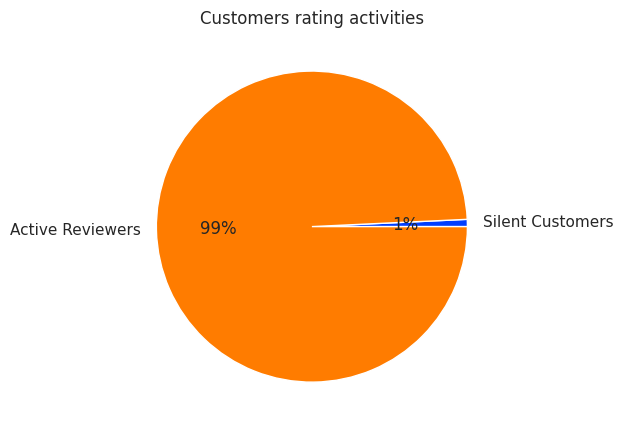

In [ ]:

colors = sns.color_palette("bright")
labels = ["Silent Customers", "Active Reviewers"]
data = [len(rfms_silent_customers) * 100 / len(rfms_duck_data),
        len(rfms_active_reviewers) * 100 / len(rfms_duck_data)
        ]

plt.pie(data, labels=labels, colors=colors, autopct="%0.0f%%")
plt.title("Customers rating activities")
plt.show()

Il n'existe 1 % des clients ne donne pas de note : il est possible de comprendre ce comportement.
Une analyse plus profonde doit être réalisée sur ces clients.

In [667]:
display(rfms_active_reviewers, rfms_silent_customers)

,customer_unique_id,recency,frequency,monetary,review_score,order_purchase_timestamp,customer_zip_code_prefix,customer_city,customer_state
0,831a032a3327e2b8325faf9d37953870,159,1,314.34,5.0,2018-05-11 16:35:19,13478,americana,SP
1,d4b1297d645ec19df4cd0af8cd6fe14a,214,1,59.18,2.0,2018-03-17 15:32:31,48410,cicero dantas,BA
2,dc184f142552a38189d5d5428d1984a6,236,1,222.68,1.0,2018-02-22 20:53:14,37410,tres coracoes,MG
3,1acfddcc366d45e07b84eedc46282cdc,66,1,264.22,5.0,2018-08-11 20:58:44,48990,andorinha,BA
4,79e12483f9b14c3254db94bd137a4b70,71,1,1480.73,1.0,2018-08-06 18:45:01,49047,aracaju,SE
...,...,...,...,...,...,...,...,...,...
96091,84b7440c2a25a2d908e7226cbeb300e8,339,1,190.03,5.0,2017-11-12 12:47:01,78050,cuiaba,MT
96092,fc06116082a6e23a21072673c4eb12f3,591,1,38.68,5.0,2017-03-05 17:27:31,45700,itapetinga,BA
96093,b3be47a665b75181ac9728442d970dde,528,1,134.56,5.0,2017-05-07 12:47:57,38402,uberlandia,MG
96094,d468040bda183009e4ec5a3efb6350ae,348,1,63.37,5.0,2017-11-03 09:41:04,15390,itapura,SP


,customer_unique_id,recency,frequency,monetary,review_score,order_purchase_timestamp,customer_zip_code_prefix,customer_city,customer_state
553,02a2a0a9627a062602de754d75038ce4,69,1,532.49,NaN,2018-08-08 20:48:39,7190,guarulhos,SP
910,1f3d63280f3cdf6f36abafcef82479ae,425,1,169.19,NaN,2017-08-18 12:38:26,79040,campo grande,MS
1063,304d32ab2f15a2ddc763e5eb70c268aa,330,1,689.19,NaN,2017-11-21 15:11:07,38180,araxa,MG
1303,d11531b2e9cf9ac4b0cf67c62e81a811,400,1,102.74,NaN,2017-09-11 17:51:34,83370,antonina,PR
1378,4f60b730f2ab0817b0a39f7315d2b400,326,1,65.76,NaN,2017-11-24 19:53:18,2883,sao paulo,SP
...,...,...,...,...,...,...,...,...,...
95549,573835df26ec74b80cb57ac9a9d69022,572,1,47.96,NaN,2017-03-23 23:44:32,13087,campinas,SP
95584,15aa251aeeec331d7ee4e1851397e8f5,77,1,136.64,NaN,2018-08-01 15:46:14,4040,sao paulo,SP
95714,3db8d7bf0403ab19834e3690691af4ad,369,1,193.56,NaN,2017-10-13 16:52:15,55014,caruaru,PE
95943,2bace073165bdc6166c6932ea26bdf14,163,1,55.94,NaN,2018-05-07 07:36:50,29101,vila velha,ES


### **Sauvegarde des données dans ``rfms_active_reviewers`` et ``rfms_silent_customers``** stockées en ``.parquet``

Le choix du ``parquet permet de préserver le typage`` réalisé lors de l'EDA

In [668]:
repo_wd

PosixPath('/home/nokan/code/donat-konan33/olist-ecommerce-client-clustering')

In [681]:
if not os.path.exists(repo_wd / "data/processed"):
    output_dir = repo_wd / "data/processed"
    output_dir.mkdir(parents=True, exist_ok=True)

rfms_active_reviewers.to_parquet(repo_wd / "data/processed" / \
    "rfms_active_reviewers.parquet", index=False, engine = "fastparquet")
rfms_silent_customers.to_parquet(repo_wd / "data/processed" / \
    "rfms_silent_customers.parquet", index=False, engine = "fastparquet")

In [683]:
# try to read from parquet saved file
test_df = pd.read_parquet(repo_wd / "data/processed" / \
    "rfms_active_reviewers.parquet", engine = "fastparquet")
test_df

,customer_unique_id,recency,frequency,monetary,review_score,order_purchase_timestamp,customer_zip_code_prefix,customer_city,customer_state
0,831a032a3327e2b8325faf9d37953870,159,1,314.34,5.0,2018-05-11 16:35:19,13478,americana,SP
1,d4b1297d645ec19df4cd0af8cd6fe14a,214,1,59.18,2.0,2018-03-17 15:32:31,48410,cicero dantas,BA
2,dc184f142552a38189d5d5428d1984a6,236,1,222.68,1.0,2018-02-22 20:53:14,37410,tres coracoes,MG
3,1acfddcc366d45e07b84eedc46282cdc,66,1,264.22,5.0,2018-08-11 20:58:44,48990,andorinha,BA
4,79e12483f9b14c3254db94bd137a4b70,71,1,1480.73,1.0,2018-08-06 18:45:01,49047,aracaju,SE
...,...,...,...,...,...,...,...,...,...
95375,84b7440c2a25a2d908e7226cbeb300e8,339,1,190.03,5.0,2017-11-12 12:47:01,78050,cuiaba,MT
95376,fc06116082a6e23a21072673c4eb12f3,591,1,38.68,5.0,2017-03-05 17:27:31,45700,itapetinga,BA
95377,b3be47a665b75181ac9728442d970dde,528,1,134.56,5.0,2017-05-07 12:47:57,38402,uberlandia,MG
95378,d468040bda183009e4ec5a3efb6350ae,348,1,63.37,5.0,2017-11-03 09:41:04,15390,itapura,SP


In [684]:
test_df.dtypes

customer_unique_id                category
recency                              int64
frequency                            int64
monetary                           float64
review_score                       float64
order_purchase_timestamp    datetime64[ns]
customer_zip_code_prefix          category
customer_city                     category
customer_state                    category
dtype: object

## **Suggestion de creation d'autres features**

- Pour chaque commande combien d'articles sont achetés
- Calculer la dépense par articles dans une commande
